# Анализ маркетинговой аналитики Яндекс.Афиши


**Цели и задачи проекта:** проанализировать данные о визитах и заказах клиентов с сайта "Яндекс.Афиши", а также связанных рекламных расходов для выделения невыгодных источников трафика и выработки рекомендаций отделу маркетинга о перераспределении бюджета.  

**Входные данные:** логи сервера с информацией о посещениях и заказах с сайта Яндекс.Афиши, а также информация о расходах на маркетинг за период с июня 2017 по конец мая 2018 года.

**Обозначения категорий исходных данных:** Исходные данные для проекта содержатся в трех файлах формата csv. Обозначения переменных для каждого датасета приведены ниже:

1) Лог сервера с информацией о посещениях сайта Яндекс.Афиши (visits_log.csv)
* *Uid* — уникальный идентификатор пользователя,
* *Device* — категория устройства пользователя,
* *Start Ts* — дата и время начала сессии,
* *End Ts* — дата и время окончания сессии,
* *Source Id* — идентификатор источника перехода на сайт.

2) Лог сервера с информации о заказах с сайта Яндекс.Афиши (orders_log.csv)
* *Uid* — уникальный идентификатор пользователя,
* *Buy Ts* — дата и время заказа,
* *Revenue* — сумма заказа.

3) Информация о расходах на маркетинг (costs.csv)
* *source_id* — идентификатор рекламного источника,
* *dt* — дата проведения рекламной кампании,
* *costs* — расходы на эту кампанию.

**План работы** над проектом включает в себя выполнение следующих шагов:
* *Импорт данных и изучение общей информации.* На этом этапе получаем общую информацию об имеющихся у нас в распоряжении данных, их типах, полноте и правильности представления. Предварительно оцениваем объем данных в каждом датасете, их минимальные и максимальные значения, присутствие пропусков и дубликатов. Дополнительно импортируем и устанавливаем обновления необходимых библиотек. 

* *Подготовка данных.* В этой части работы обращаем пристальное внимание на недостатки исходных данных: переименовываем переменные (названия столбцов) и приводим их названия к единому стандарту. Анализируем пропуски и оцениваем необходимость обработки пропусков в данных. Преобразуем данные в верный тип, проверяем их на присутствие ошибочных значений и обрабатываем дубликаты (если присутствуют) с целью исключения искажений в результатах. 

* *Расчет и анализ данных.* В данном проекте эта стадия складывается из выполнения трех взаимосвязанных этапов расчета и анализа: (1) продуктовых метрик (количество уникальных пользователе в день/неделю/месяц, среднее ежедневное посещение сайта, продолжительность пользовательской сессии и коэффициент удержания пользователей); (2) метрики электронной коммерции (среднее время с момента первого посещения сайта до совершения покупки, среднее количество покупок на одного покупателя за определённый период, средний чек, "пожизненная" ценность клиента); (3) маркетинговых метрик (общая сумма расходов на маркетинг и распределение трат по источникам трафика, средняя стоимость привлечения клиента и возврат на маркетинговые инвестиции). Изменения указанных метрик отражаются в сводных таблицах/таблицах когортного анализа и диаграммах/графиках во времени, полученных по результатам группировки, подсчету и агрегирования различных данных.

* *Формулирование общего вывода*. На заключительном этапе приводится сумма выводов и рекомендаций по каждой части выполненного проекта. В общем выводе мы отразим ключевые рекомендации для отдела маркетинга по перераспределению расходов по источникам трафика.

**Используемые сокращения:**
* *DAU* (от англ. daily active users) — количество уникальных пользователей в день;
* *WAU* (от англ. weekly active users) — количество уникальных пользователей в неделю;
* *MAU* (от англ. monthly active users) — количество уникальных пользователей в месяц;
* *ASL* (от англ. average session length) - средняя продолжительность пользовательской сессии; 
* *RR* (от англ. retantion rate) — коэффициент удержания пользователей;
* *AOV* (от англ. average order value) — средний чек;
* *LTV* (от англ. lifetime value) — "пожизненная" ценность клиента; 
* *CAC* (от англ. customer acquisition cost) — стоимость привлечения клиента;
* *ROMI* (от англ. return on marketing investment) — возврат на маркетинговые инвестиции. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-данных-и-изучение-общей-информации" data-toc-modified-id="Импорт-данных-и-изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт данных и изучение общей информации</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчет-и-анализ-данных" data-toc-modified-id="Расчет-и-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчет и анализ данных</a></span><ul class="toc-item"><li><span><a href="#Расчет-продуктовых-метрик" data-toc-modified-id="Расчет-продуктовых-метрик-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Расчет продуктовых метрик</a></span><ul class="toc-item"><li><span><a href="#Определение-метрик-DAU,-WAU-и-MAU" data-toc-modified-id="Определение-метрик-DAU,-WAU-и-MAU-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Определение метрик DAU, WAU и MAU</a></span></li><li><span><a href="#Ежедневное-посещение-сайта" data-toc-modified-id="Ежедневное-посещение-сайта-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Ежедневное посещение сайта</a></span></li><li><span><a href="#Продолжительность-пользовательской-сессии" data-toc-modified-id="Продолжительность-пользовательской-сессии-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Продолжительность пользовательской сессии</a></span></li><li><span><a href="#Расчет-коэффициента-удержания-пользователей" data-toc-modified-id="Расчет-коэффициента-удержания-пользователей-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Расчет коэффициента удержания пользователей</a></span></li><li><span><a href="#Промежуточные-выводы" data-toc-modified-id="Промежуточные-выводы-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>Промежуточные выводы</a></span></li></ul></li><li><span><a href="#Расчет-метрик-электронной-коммерции" data-toc-modified-id="Расчет-метрик-электронной-коммерции-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Расчет метрик электронной коммерции</a></span><ul class="toc-item"><li><span><a href="#Среднее-время-с-момента-первого-посещения-сайта-до-совершения-покупки" data-toc-modified-id="Среднее-время-с-момента-первого-посещения-сайта-до-совершения-покупки-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Среднее время с момента первого посещения сайта до совершения покупки</a></span></li><li><span><a href="#Cреднее-количество-покупок-на-одного-покупателя-за-определённый-период" data-toc-modified-id="Cреднее-количество-покупок-на-одного-покупателя-за-определённый-период-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Cреднее количество покупок на одного покупателя за определённый период</a></span></li><li><span><a href="#Ежемесячное-количество-и-стоимость-покупок.-Cредний-чек." data-toc-modified-id="Ежемесячное-количество-и-стоимость-покупок.-Cредний-чек.-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Ежемесячное количество и стоимость покупок. Cредний чек.</a></span></li><li><span><a href="#«Пожизненная»-ценность-клиента-(метрика-LTV)" data-toc-modified-id="«Пожизненная»-ценность-клиента-(метрика-LTV)-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>«Пожизненная» ценность клиента (метрика LTV)</a></span></li><li><span><a href="#Промежуточные-выводы" data-toc-modified-id="Промежуточные-выводы-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>Промежуточные выводы</a></span></li></ul></li><li><span><a href="#Расчет-маркетинговых-метрик" data-toc-modified-id="Расчет-маркетинговых-метрик-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Расчет маркетинговых метрик</a></span><ul class="toc-item"><li><span><a href="#Общая-сумма-расходов-на-маркетинг-и-распределение-трат-по-источникам-перехода-на-сайт" data-toc-modified-id="Общая-сумма-расходов-на-маркетинг-и-распределение-трат-по-источникам-перехода-на-сайт-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Общая сумма расходов на маркетинг и распределение трат по источникам перехода на сайт</a></span></li><li><span><a href="#Динамика-изменения-расходов-во-времени" data-toc-modified-id="Динамика-изменения-расходов-во-времени-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Динамика изменения расходов во времени</a></span></li><li><span><a href="#Стоимость-привлечения-клиента-(метрика-САС)" data-toc-modified-id="Стоимость-привлечения-клиента-(метрика-САС)-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Стоимость привлечения клиента (метрика САС)</a></span></li><li><span><a href="#Расчет-ROMI-по-когортам-в-разрезе-источников" data-toc-modified-id="Расчет-ROMI-по-когортам-в-разрезе-источников-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Расчет ROMI по когортам в разрезе источников</a></span></li><li><span><a href="#Промежуточные-выводы" data-toc-modified-id="Промежуточные-выводы-3.3.5"><span class="toc-item-num">3.3.5&nbsp;&nbsp;</span>Промежуточные выводы</a></span></li></ul></li></ul></li><li><span><a href="#Выводы-и-рекомендации" data-toc-modified-id="Выводы-и-рекомендации-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы и рекомендации</a></span></li></ul></div>

## Импорт данных и изучение общей информации

In [1]:
# установка обновлений пакетов Seaborn и Plotly для визуализации данных
!pip install seaborn==0.11.2 -q
!pip install plotly==5.1.0 -q

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
# получение статичных изображений графиков plotly для отображения на GitHub
import plotly.io as pio
pio.renderers.default = "svg"

In [4]:
df_visits = pd.read_csv('visits_log.csv')
df_orders = pd.read_csv('orders_log.csv')
df_costs = pd.read_csv('costs.csv')

Предварительно ознакомимся с имеющимися датасетами, используя следующий шаблон-функцию:

In [5]:
def general_info(dataset):
    """
    Функция дает краткую информацию о датасете, максимальных и минимальных значениях численных переменных
    и присутствии дубликатов в данных.
    """
                  
    # Вывод всех колонок датасета из запроса
    print('')
    print('\033[1m' + 'Информация, включающая записи датасета' + '\033[0m')
    pd.set_option('display.max_columns', None)
    display(dataset.head(5))
    
    # Вывод информации о размере датасета, типе данных и пропущенных/минимальных/максимальных значениях 
    
    print(f'\033[1m' + f'Информация о размере датасета, типе данных и пропущенных значениях:' + '\033[0m')
    dataset.info()
          
    # Вывод информации о количестве дубликатов
    print('')
    duplicates_amount = dataset.duplicated().sum()
    print('\033[1m' + 'Количество дубликатов в данных:'+ '\033[0m', duplicates_amount)

Получим информацию из исходного датасета *df_visits* о посещениях сайта Яндекс.Афиши 

In [6]:
general_info(df_visits)


Информация, включающая записи датасета


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


Информация о размере датасета, типе данных и пропущенных значениях:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB

Количество дубликатов в данных: 0


**Промежуточные выводы:**
* Данные файла формата csv представлены в требуемой кодировке и не имеют нечитаемых символов;
* Исходный датасет с информацией о посещениях сайта содержит 359400 записей, разделенной по 5-ти параметрам-характеристикам;
* Названия колонок датасета требуется привести к нижнему регистру и исключить из названий пробелы;
* Тип данных колонок *start_ts* и *end_ts* требует преобразования из *object* в *datetime64*;
* Датасет *df_visits* не содержит пропуски и дубликаты.

Получим информацию из исходного датасета *df_orders* о заказах с сайта Яндекс.Афиши:

In [7]:
general_info(df_orders)


Информация, включающая записи датасета


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


Информация о размере датасета, типе данных и пропущенных значениях:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB

Количество дубликатов в данных: 0


**Промежуточные выводы:**
* Данные файла формата csv представлены в требуемой кодировке и не имеют нечитаемых символов;
* Исходный датасет о заказах с сайта содержит 50415 записей с информацией, разделенной по 3-м параметрам-характеристикам;
* Названия колонок датасета требуется привести к нижнему регистру и исключить из названий пробелы; 
* Тип данных колонки *buy_ts* требует преобразования из *object* в *datetime64*;
* Датасет *df_orders* не содержит пропуски и дубликаты.

Получим информацию из исходного датасета *df_costs* о расходах на маркетинг

In [8]:
general_info(df_costs)


Информация, включающая записи датасета


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Информация о размере датасета, типе данных и пропущенных значениях:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB

Количество дубликатов в данных: 0


**Промежуточные выводы:**
* Данные файла формата csv представлены в требуемой кодировке и не имеют нечитаемых символов;
* Исходный датасет  с информацией о расходах на маркетинг содержит 2542 записей, разделенной по 3-м параметрам-характеристикам;
* Название колонки *dt* требует переименования в *date*; 
* Тип данных колонки даты проведения рекламной кампании необходимо преобразовать из *object* в *datetime64*;
* Датасет *df_costs* не содержит пропуски и дубликаты.

## Предобработка данных

Приведем названия колонок в датасетах *df_visits* и *df_orders* к нижнему регистру и заменим пробелы на нижнее подчеркивание:  

In [9]:
df_visits.columns = df_visits.columns.str.replace(' ', '_').str.lower()
df_orders.columns = df_orders.columns.str.replace(' ', '_').str.lower()

In [10]:
df_visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [11]:
df_orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


Переименуем название колонки *dt* в датасете *df_costs* на *date*

In [12]:
df_costs = df_costs.rename(columns={
    'dt': 'date'
})
df_costs.head()

,source_id,date,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Приведем значения параметров *start_ts*, *end_ts* (датасет *df_visits*), *buy_ts* (датасет *df_orders*), *date* (датасет *df_costs*) к типу данных, соответствующему дате и времени:

In [13]:
df_visits['start_ts'] = pd.to_datetime(df_visits['start_ts'], format='%Y-%m-%dT%H')
df_visits['end_ts'] = pd.to_datetime(df_visits['end_ts'], format='%Y-%m-%dT%H')
df_orders['buy_ts'] = pd.to_datetime(df_orders['buy_ts'], format='%Y-%m-%dT%H')
df_costs['date'] = pd.to_datetime(df_costs['date'], format='%Y-%m-%d')

Проверим интервал дат на соответствие заданию:

In [14]:
print(min(df_costs['date']), max(df_costs['date']))

2017-06-01 00:00:00 2018-05-31 00:00:00


In [15]:
print(min(df_visits['start_ts']), max(df_visits['start_ts']))

2017-06-01 00:01:00 2018-05-31 23:59:00


In [16]:
print(min(df_orders['buy_ts']), max(df_orders['buy_ts']))

2017-06-01 00:10:00 2018-06-01 00:02:00


В логе сервера с информации о заказах содержатся данные за 2018-06-01, что выходит за рамки анализируемого интервала (1 июня 2017 г. - 31 мая 2018 г.). Удалим из датасета избыточные данные: 

In [17]:
df_orders = df_orders.loc[(df_orders['buy_ts'] <= '2018-05-31 23:59:59')]
df_orders

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50409,2018-05-31 23:43:00,3.67,1805512004303848280
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849


**Промежуточные выводы:**
* Данные датасетов приведены к требуемому типу, названия колонок унифицированы, а интервалы дат исходных данных соответствуют заданию проекта.

## Расчет и анализ данных

### Расчет продуктовых метрик

#### Определение метрик DAU, WAU и MAU

Для оценки посещаемости онлайн-сервиса удобно использовать метрики DAU, WAU и MAU, определяющие число активных/уникальных пользователей в день/неделю/месяц. Как следствие, на основе этих метрик можно оценить вовлеченность пользователей в продукт и спланировать стратегию его продвижения. Для определения этих метрик сгруппируем данные по дате сессии в категориях день/неделя/месяц и вычислим для каждой временной категории среднее число уникальных посетителей сайта: 

In [18]:
df_visits['session_date'] = df_visits['start_ts'].dt.date
df_visits['session_week'] = df_visits['start_ts'].astype('datetime64[W]')
df_visits['session_month'] = df_visits['start_ts'].astype('datetime64[M]')

In [19]:
df_visits.head()

,device,end_ts,source_id,start_ts,uid,session_date,session_week,session_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01


In [20]:
dau = df_visits.groupby('session_date').agg({'uid': 'nunique'}).reset_index()
wau = df_visits.groupby('session_week') \
                     .agg({'uid': 'nunique'}).reset_index()
mau = df_visits.groupby('session_month') \
                     .agg({'uid': 'nunique'}).reset_index()

In [21]:
print('Среднее число уникальных пользователей за весь период составляет (чел.):')
dau_total = dau['uid'].mean()
print(f'- в день:', dau_total)
wau_total = wau['uid'].mean()
print(f'- в неделю:', wau_total)
mau_total = mau['uid'].mean()
print(f'- в месяц:', mau_total)

Среднее число уникальных пользователей за весь период составляет (чел.):
- в день: 907.9917582417582
- в неделю: 5724.415094339623
- в месяц: 23228.416666666668


Отобразим на графиках изменения метрик DAU, WAU и MAU во времени:

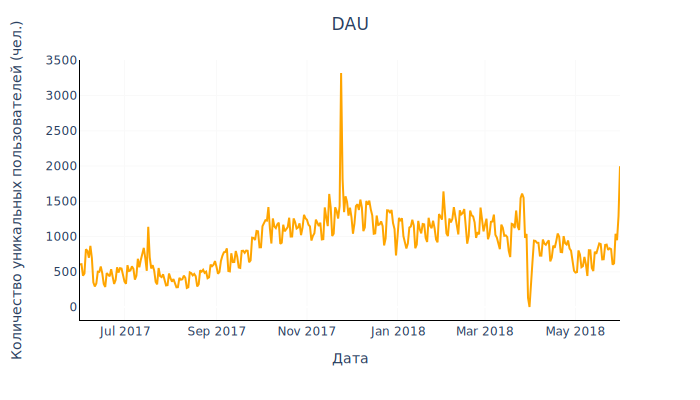

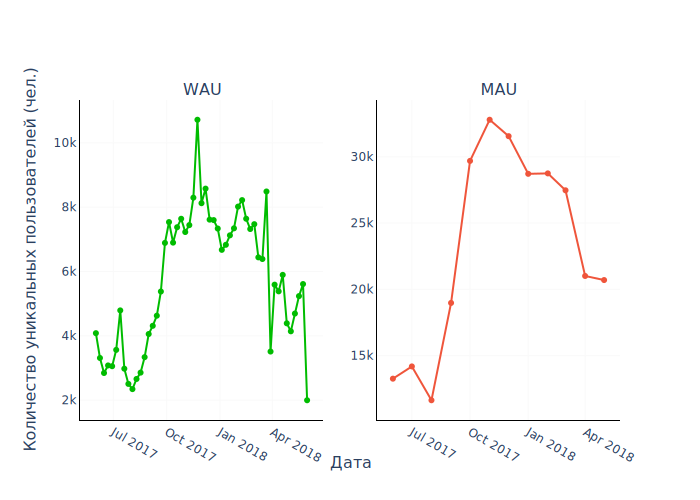

In [22]:
# DAU график

fig = px.line(
    dau,
    x="session_date",
    y="uid",
    height = 400
)
fig.update_traces(line_color='#ffa500')
fig.update_xaxes(showline=True, linewidth=1, linecolor='black', gridcolor='#f9f9f9')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', gridcolor='#f9f9f9')

fig.update_layout(title='DAU',
                  xaxis_title='Дата',
                  yaxis_title='Количество уникальных пользователей (чел.)',
                  plot_bgcolor='#ffffff'
                 )
fig.update(layout=dict(title=dict(x=0.5)))
fig.show()

# WAU и MAU графики
fig1 = px.line(
    wau,
    x="session_week",
    y="uid"
)

fig2 = px.line(
    mau,
    x="session_month",
    y="uid"
)

# plotly express не поддерживает создание subplots напрямую
fig = make_subplots(rows=1, cols=2, 
                    column_titles=('WAU', 'MAU'), 
                    x_title='Дата', 
                    y_title='Количество уникальных пользователей (чел.)',
                    )

for d in fig1.data:
    fig.add_trace((go.Scatter(x=d['x'], y=d['y'])), row=1, col=1)
    
    fig.update_traces(line_color='#00bc00', mode='lines+markers')
    fig.update_xaxes(showline=True, linewidth=1, linecolor='black', gridcolor='#f9f9f9')
    fig.update_yaxes(showline=True, linewidth=1, linecolor='black', gridcolor='#f9f9f9')

    fig.update_layout(plot_bgcolor='#ffffff', showlegend=False)
        
    
for d in fig2.data:
    fig.add_trace((go.Scatter(x=d['x'], y=d['y'])), row=1, col=2)
        
fig.show()

Динамика изменений с использованием DAU - хороший индикатор для определения "событийных" изменений, связанных с конкретной датой или действий, предшествующей этой дате. Примерами полезности метрики может служить сигнал резкого всплеска числа уникальных пользователей сайта 24 ноября 2017, а также его резкое снижение, начиная с 29 марта по 3 апреля 2018 г, что является отражением каких-либо событий/акций/неисправностей. 

Метрика WAU - удобна в данном случае для регулярного контроля с целью отслеживания тенденций по увеличению или снижению числа уникальных пользователей на платформе. В данном проекте график WAU показывает, что рост числа уникальных пользователей начался в августе 2017 г и достиг пиковых значений в конце ноября 2017 г. Далее наблюдается нисходящий тренд посещаемости сервиса, который, при желании, можно оперативно заметить и постараться скорректировать действиями. 

Метрика MAU - удобна для принятия стратегических решений по развитию продукта, оценки его привлекательности в глазах пользователей в долгосрочной перспективе. Метрика менее оперативна, но позволяет сгладить недельные колебания для получения более ясной картины.  

#### Ежедневное посещение сайта

Сгруппируем данные по дате пользования услугами сайта и отразим общее и уникальное количество посещений в день:

In [23]:
sessions = df_visits.groupby('session_date').agg({'uid': ['count', 'nunique']}).reset_index()
sessions.columns = ['session_date', 'n_sessions', 'n_users']

Определим сколько раз за день пользователи в среднем заходят на сайт:

In [24]:
print("Среднее число сессий в день:", sessions['n_sessions'].mean())

Среднее число сессий в день: 987.3626373626373


Визуализируем динамику ежедневных изменений в течение изучаемого интервала дат:

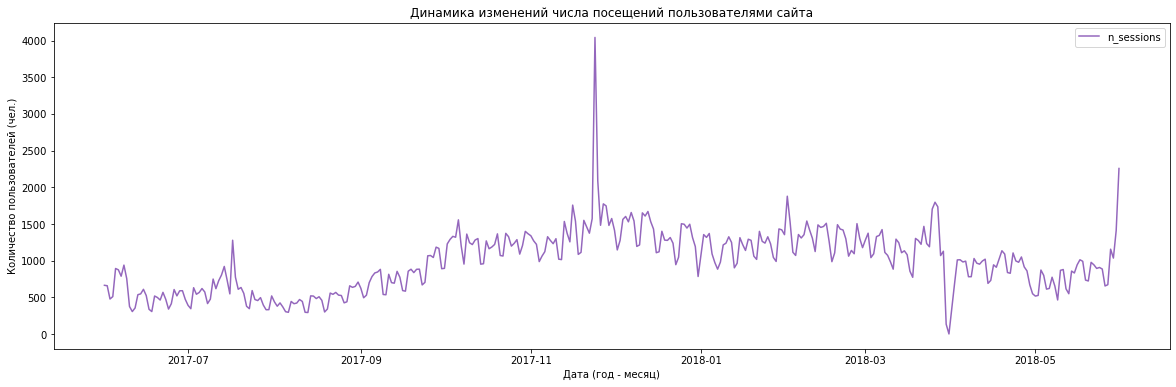

In [25]:
g = sessions.plot(
    x='session_date',
    y='n_sessions',
    kind ='line',
    color='C4',
    figsize=(20, 6)
)
g.set_title('Динамика изменений числа посещений пользователями сайта')
g.set_ylabel('Количество пользователей (чел.)')
g.set_xlabel('Дата (год - месяц)')
    
plt.show()

Обратим также внимание на уникальность пользователей, заходящих на сайт в течение дня: 

In [26]:
sessions['sess_per_user'] = sessions['n_sessions'] / sessions['n_users']
display(round(sessions['sess_per_user'].mean(), 2))

1.08

Полученное значение указывает на то, что в среднем за год около 8% пользователей в течение дня посещают сайт более одного раза. Остальной процент формируют единичные уникальные визиты на сайт. Их динамика ежедневных посещений в течение года приведена ниже: 

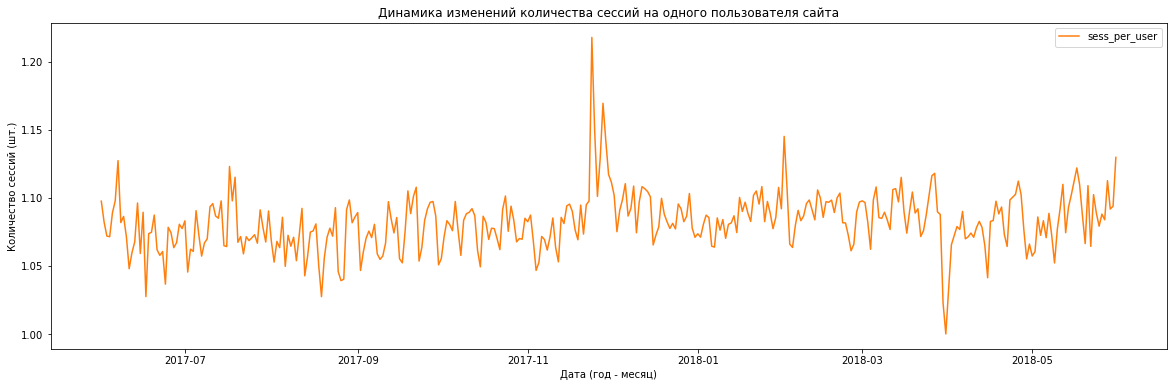

In [27]:
g = sessions.plot(
    x='session_date',
    y='sess_per_user',
    kind ='line',
    color='C1',
    figsize=(20, 6)
)
g.set_title('Динамика изменений количества сессий на одного пользователя сайта')
g.set_ylabel('Количество сессий (шт.)')
g.set_xlabel('Дата (год - месяц)')
    
plt.show()

#### Продолжительность пользовательской сессии

Продолжительность пользовательской сессии (ASL) определим из данных по времени начала и окончания присутствия пользователя на сайте и представим в секундах:

In [28]:
df_visits['session_duration_sec'] = (
    df_visits['end_ts'] - df_visits['start_ts']
).dt.seconds

In [29]:
df_visits['session_duration_sec'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

Для определения правильной метрики ASL построим распределение по продолжительности сессий:

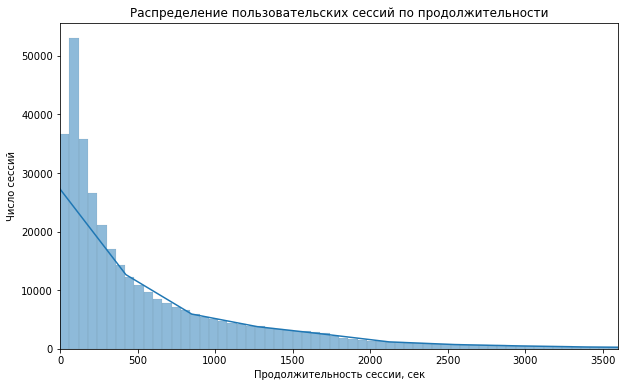

In [30]:
plt.figure(figsize=(10, 6))
g = sns.histplot(data = df_visits, x='session_duration_sec', binwidth = 60, kde = True);

g.set_title('Распределение пользовательских сессий по продолжительности')
g.set_ylabel('Число сессий')
g.set_xlabel('Продолжительность сессии, сек')
plt.xlim(0, 3600)

plt.show()

Из гистограммы видно, что распределение данных отличается от нормального и смещено вправо от максимальных значений числа сессий. Среднее значение продолжительности сессии без предварительной обработки данных даст ошибочный результат. Исключение же выбросов (которые лишь отражают поведение пользователей) внесет ошибку в интерпретацию данных. В этой связи для оценки продолжительности сессии целесообразно использовать медиану (равна 5 минутам) или моду (60 сек), расчет которой приведен ниже.  

In [31]:
print(df_visits['session_duration_sec'].mode())

0    60
dtype: int64


#### Расчет коэффициента удержания пользователей 

Определим для каждого пользователя дату, когда он впервые проявил активность на сайте Яндекс.Афиша:

In [32]:
# определяем дату и время первой сессии каждого пользователя
first_visits = df_visits.groupby('uid').agg({'start_ts': 'min'}).reset_index()
first_visits.columns = ['uid', 'first_session_time']

# приведем колонки, связанные с датами, к формату datetime64:
first_visits['first_session_month'] = first_visits['first_session_time'].astype('datetime64[M]')
first_visits['first_session_date'] = first_visits['first_session_time'].astype('datetime64[M]')

# добавляем детали первой сессии в датафрейм с информацией о посещениях сайта и сохраним в датафрейм vis 
vis = pd.merge(first_visits, df_visits, on='uid')
vis.head()

,uid,first_session_time,first_session_month,first_session_date,device,end_ts,source_id,start_ts,session_date,session_week,session_month,session_duration_sec
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,2018-03-01,2018-03-01,2018-03-01,360
1,49537067089222,2018-02-06 15:55:00,2018-02-01,2018-02-01,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2018-02-06,2018-02-01,2018-02-01,120
2,297729379853735,2017-06-07 18:47:00,2017-06-01,2017-06-01,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,2017-06-07,2017-06-01,2017-06-01,60
3,313578113262317,2017-09-18 22:49:00,2017-09-01,2017-09-01,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,2018-03-11,2018-03-08,2018-03-01,360
4,313578113262317,2017-09-18 22:49:00,2017-09-01,2017-09-01,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01,1080


In [33]:
vis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359400 entries, 0 to 359399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   uid                   359400 non-null  uint64        
 1   first_session_time    359400 non-null  datetime64[ns]
 2   first_session_month   359400 non-null  datetime64[ns]
 3   first_session_date    359400 non-null  datetime64[ns]
 4   device                359400 non-null  object        
 5   end_ts                359400 non-null  datetime64[ns]
 6   source_id             359400 non-null  int64         
 7   start_ts              359400 non-null  datetime64[ns]
 8   session_date          359400 non-null  object        
 9   session_week          359400 non-null  datetime64[ns]
 10  session_month         359400 non-null  datetime64[ns]
 11  session_duration_sec  359400 non-null  int64         
dtypes: datetime64[ns](7), int64(2), object(2), uint64(1)
memor

Определим время прошедшее с момента первого визита пользователя на сайт (lifetime):

In [34]:
vis['cohort_lifetime'] = vis['session_month'] - vis['first_session_month']

Определим возраст когорт, прошедший между датой первого посещения пользователем сайта (месяц когорты) и последующими сессиями:

In [35]:
vis['cohort_lifetime'] = vis['cohort_lifetime'] / np.timedelta64(1, 'M')
vis['cohort_lifetime'] = vis['cohort_lifetime'].round().astype('int')

Сгруппируем данные по когорте и возрасту когорты. Посчитаем для каждой когорты количество уникальных пользователей на определённый месяц "жизни" когорт:

In [36]:
cohorts = vis.groupby(['first_session_month','cohort_lifetime']
                           ).agg({'uid':'nunique'}).reset_index()
cohorts

,first_session_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909
...,...,...,...
73,2018-03-01,1,861
74,2018-03-01,2,557
75,2018-04-01,0,15709
76,2018-04-01,1,760


Этот же датасет можно представить в более удобной форме сводной таблицы:

In [37]:
cohorts_pivot = vis.pivot_table(
    index='first_session_month',
    columns='cohort_lifetime',
    values='uid',
    aggfunc='nunique',
)

cohorts_pivot.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_session_month,,,,,,,,,,,,
2017-06-01,13259.0,1043,713,814,909,947,809,766,694,674,539,596
2017-07-01,13140.0,737,674,738,765,633,596,601,510,376,361,
2017-08-01,10181.0,783,640,639,510,448,370,402,284,265,,
2017-09-01,16704.0,1428,1156,847,658,632,599,404,381,,,
2017-10-01,25977.0,2042,1357,1012,890,837,555,529,,,,
2017-11-01,27248.0,2133,1202,1054,919,638,594,,,,,
2017-12-01,25268.0,1410,960,786,512,481,,,,,,
2018-01-01,22624.0,1351,890,565,458,,,,,,,
2018-02-01,22197.0,1267,565,446,,,,,,,,


или тепловой карты, с использованием графической библиотеки seaborn:

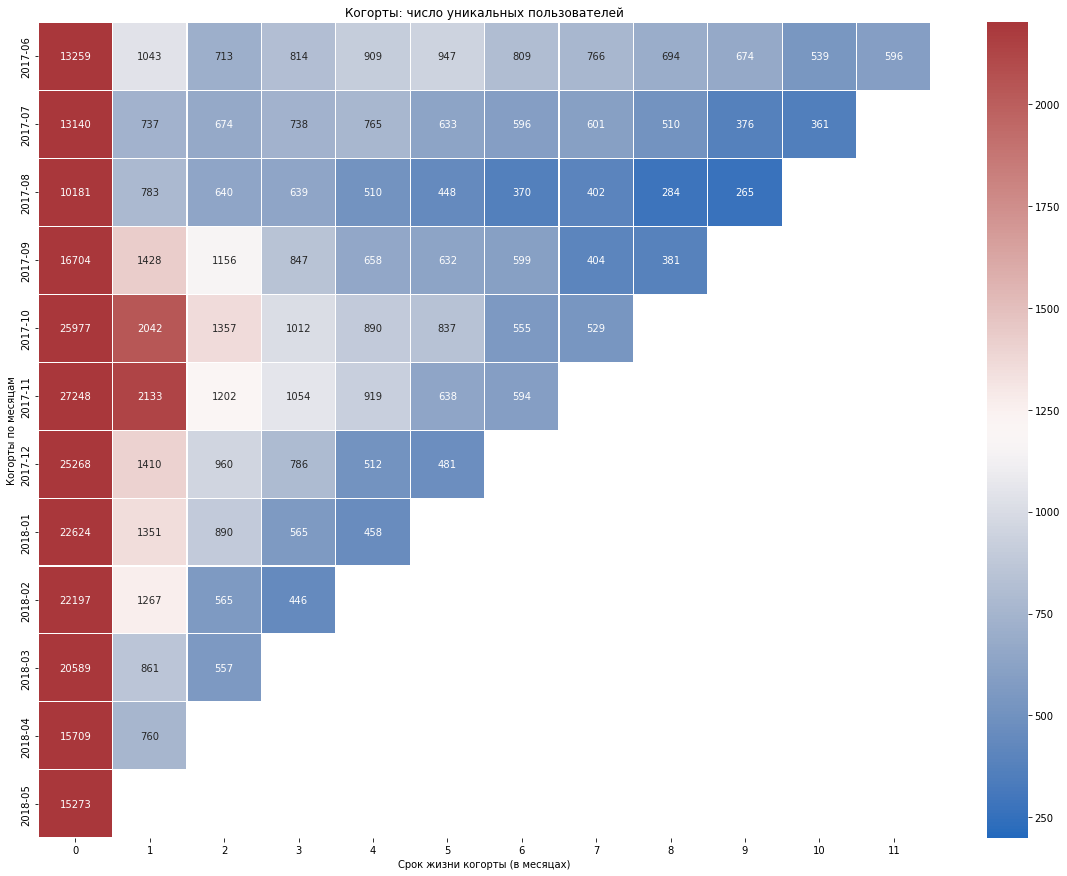

In [38]:
yaxis_name = cohorts['first_session_month'].unique().astype('datetime64[M]')

fig, ax = plt.subplots(figsize=(20, 15))
g = sns.heatmap(cohorts_pivot, 
                annot=True, fmt='g', linewidths=.1,
                vmin=200, vmax=2200,
                yticklabels=yaxis_name,
                cmap='vlag' 
);
g.set_title('Когорты: число уникальных пользователей')
g.set_ylabel('Когорты по месяцам')
g.set_xlabel('Срок жизни когорты (в месяцах)')

plt.show()

Для вычисления коэффициента удержания *RR* определим число пользователей изначально бывших в когорте и количество пользователей в каждый следующий месяц "жизни" когорты:

In [39]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][
    ['first_session_month', 'uid']
]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
display(initial_users_count.head(5))

,first_session_month,cohort_users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977


Добавим столбец с начальным числом пользователей для каждой когорты:

In [40]:
cohorts = cohorts.merge(initial_users_count,on='first_session_month')

In [41]:
cohorts.head(5)

,first_session_month,cohort_lifetime,uid,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259


Рассчитаем Retention Rate, разделив ежемесячное количество пользователей сайта на исходное число пользователей в когорте:

In [42]:
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']
cohorts.head()

,first_session_month,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557


Построим сводную таблицу и создадим тепловую карту:

In [43]:
retention_pivot = cohorts.pivot_table(
    index='first_session_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
)

retention_pivot.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_session_month,,,,,,,,,,,,
2017-06-01,1.0,0.0786635,0.0537748,0.0613923,0.0685572,0.0714232,0.0610152,0.0577721,0.0523418,0.0508334,0.0406516,0.0449506
2017-07-01,1.0,0.0560883,0.0512938,0.0561644,0.0582192,0.0481735,0.0453577,0.0457382,0.0388128,0.0286149,0.0274734,
2017-08-01,1.0,0.076908,0.0628622,0.062764,0.0500933,0.0440035,0.0363422,0.0394853,0.0278951,0.0260289,,
2017-09-01,1.0,0.0854885,0.069205,0.0507064,0.0393918,0.0378352,0.0358597,0.0241858,0.0228089,,,
2017-10-01,1.0,0.078608,0.0522385,0.0389575,0.0342611,0.0322208,0.0213651,0.0203642,,,,
2017-11-01,1.0,0.078281,0.0441133,0.0386817,0.0337272,0.0234146,0.0217998,,,,,
2017-12-01,1.0,0.0558018,0.0379927,0.0311065,0.0202628,0.0190359,,,,,,
2018-01-01,1.0,0.0597153,0.0393388,0.0249735,0.020244,,,,,,,
2018-02-01,1.0,0.0570798,0.0254539,0.0200928,,,,,,,,


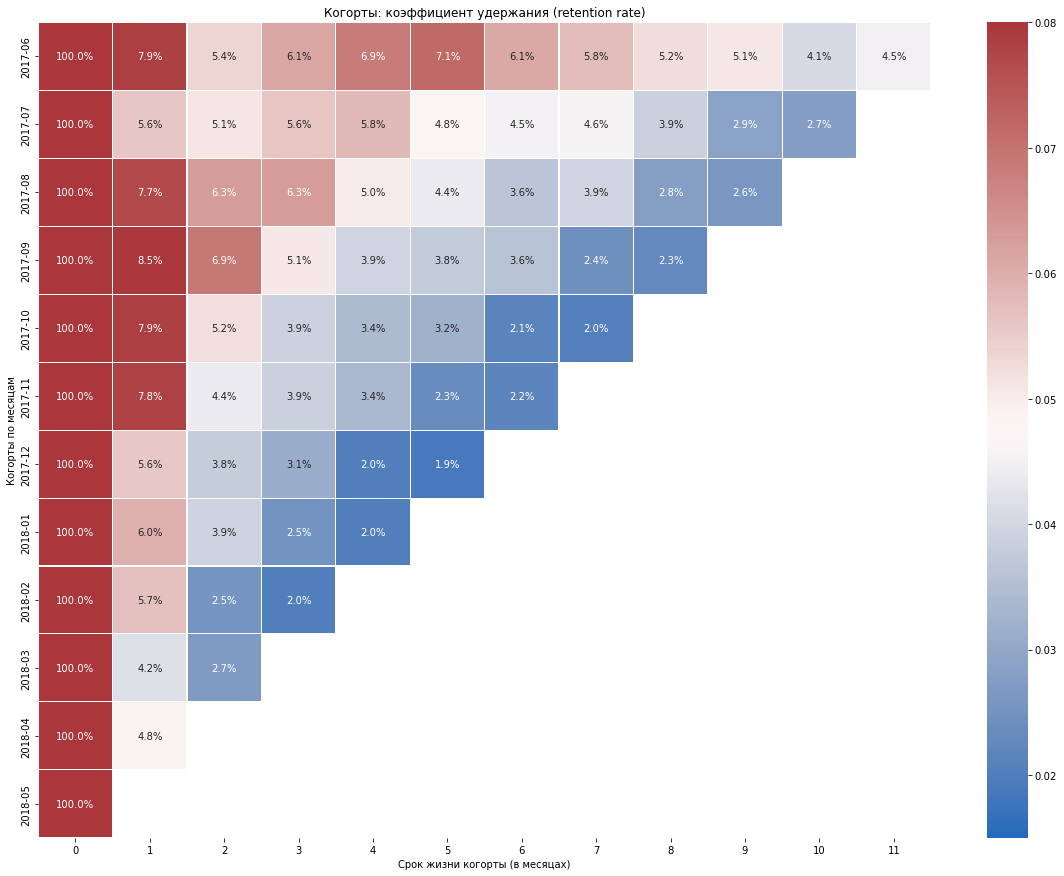

In [44]:
yaxis_name = cohorts['first_session_month'].unique().astype('datetime64[M]')

fig, ax = plt.subplots(figsize=(20, 15))
g = sns.heatmap(retention_pivot, 
                annot=True, fmt='.1%', linewidths=.1,
                vmin=0.015, vmax=0.08, 
                cmap='vlag', 
                yticklabels=yaxis_name
);
g.set_title('Когорты: коэффициент удержания (retention rate)')
g.set_ylabel('Когорты по месяцам')
g.set_xlabel('Срок жизни когорты (в месяцах)')

plt.show()

Определим средний коэффициент удержания на второй месяц «жизни» когорт:

In [45]:
retantion_second_month = cohorts.query('cohort_lifetime == 1')['retention'].mean()
print('Средний коэффициент удержания RR на второй месяц: {:.1%}'.format(retantion_second_month))

Средний коэффициент удержания RR на второй месяц: 6.5%


#### Промежуточные выводы

- Среднее число уникальных пользователей за период с июня 2017 г. по конец мая 2018 г. составляет: 907 чел. в день, 5724 чел. в неделю и 23228 чел. в месяц.
- Метрика DAU указывает резкий всплеск числа уникальных пользователей сайта 24 ноября 2017, а также его резкое снижение, начиная с 29 марта по 3 апреля 2018 г, что вероятно является отражением каких-либо событий/акций/неисправностей.
- Метрика WAU показывает, что в рассматриваемый временной интервал рост уникального числа пользователей наблюдается в августе 2017 г. и достигает пиковых значений в конце ноября 2017 г. Далее наблюдается нисходящий тренд посещаемости сервиса.
- Метрика MAU подтверждает характер кривой изменения WAU во времени. Метрика менее оперативна, но позволяет сгладить недельные колебания данных WAU для получения более ясной картины. Она удобна для принятия стратегических решений по развитию продукта, оценки его привлекательности в глазах пользователей в среднесрочной/долгосрочной перспективе.
- Среднее число сессий на сайте составляет 987 в день.
- В среднем около 8% пользователей в течение дня посещают сайт более одного раза. Остальной процент формируют единичные уникальные визиты пользователей.
- Медианная продолжительность пользовательской сессии на сайте составляет 5 минут, модальная - 60 сек.
- Средний коэффициент удержания RR на второй месяц равен 6.5%.

### Расчет метрик электронной коммерции

#### Среднее время с момента первого посещения сайта до совершения покупки

Определим время первой покупки для каждого покупателя и связанный с ней первый месяц покупки (когорта):

In [46]:
first_orders = df_orders.groupby(['uid']).agg({'buy_ts': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_time']
first_orders['first_order_date'] = first_orders['first_order_time'].dt.date
first_orders['first_order_month'] = first_orders['first_order_time'].astype('datetime64[M]')
first_orders.head()

,uid,first_order_time,first_order_date,first_order_month
0,313578113262317,2018-01-03 21:51:00,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11 18:33:00,2017-10-11,2017-10-01
3,2464366381792757,2018-01-28 15:54:00,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01


In [47]:
first_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36522 entries, 0 to 36521
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   uid                36522 non-null  uint64        
 1   first_order_time   36522 non-null  datetime64[ns]
 2   first_order_date   36522 non-null  object        
 3   first_order_month  36522 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(1), uint64(1)
memory usage: 1.1+ MB


Выведем датасет с данными о первых сессиях и добавим в него колонку с указанием месяца первой сессии для каждого пользователя 

In [48]:
first_visits['first_session_date'] = first_visits['first_session_time'].dt.date
first_visits['first_session_month'] = first_visits['first_session_time'].astype('datetime64[M]')
first_visits.head()

,uid,first_session_time,first_session_month,first_session_date
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01
1,49537067089222,2018-02-06 15:55:00,2018-02-01,2018-02-06
2,297729379853735,2017-06-07 18:47:00,2017-06-01,2017-06-07
3,313578113262317,2017-09-18 22:49:00,2017-09-01,2017-09-18
4,325320750514679,2017-09-30 14:29:00,2017-09-01,2017-09-30


In [49]:
first_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228169 entries, 0 to 228168
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   uid                  228169 non-null  uint64        
 1   first_session_time   228169 non-null  datetime64[ns]
 2   first_session_month  228169 non-null  datetime64[ns]
 3   first_session_date   228169 non-null  object        
dtypes: datetime64[ns](2), object(1), uint64(1)
memory usage: 7.0+ MB


Объединим данные первых сессий пользователей с данными о первых покупках и приведем тип данных дат к datetime64:

In [50]:
buyers = pd.merge(first_visits, first_orders, on='uid') 
buyers['first_session_date'] = pd.to_datetime(buyers['first_session_date'])
buyers['first_order_date'] = pd.to_datetime(buyers['first_order_date'])
buyers.head()

,uid,first_session_time,first_session_month,first_session_date,first_order_time,first_order_date,first_order_month
0,313578113262317,2017-09-18 22:49:00,2017-09-01,2017-09-18,2018-01-03 21:51:00,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-01,2017-06-03,2017-06-03 10:13:00,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11 17:14:00,2017-10-01,2017-10-11,2017-10-11 18:33:00,2017-10-11,2017-10-01
3,2464366381792757,2018-01-27 20:10:00,2018-01-01,2018-01-27,2018-01-28 15:54:00,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-01,2017-11-24,2017-11-24 10:14:00,2017-11-24,2017-11-01


In [51]:
buyers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36522 entries, 0 to 36521
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   uid                  36522 non-null  uint64        
 1   first_session_time   36522 non-null  datetime64[ns]
 2   first_session_month  36522 non-null  datetime64[ns]
 3   first_session_date   36522 non-null  datetime64[ns]
 4   first_order_time     36522 non-null  datetime64[ns]
 5   first_order_date     36522 non-null  datetime64[ns]
 6   first_order_month    36522 non-null  datetime64[ns]
dtypes: datetime64[ns](6), uint64(1)
memory usage: 2.2 MB


Определим время с момента первого визита до первой покупки для каждого пользователя. Представим время в двух форматах (полном и в минутах): 

In [52]:
buyers['time_to_first_order'] = (buyers['first_order_time'] - buyers['first_session_time'])
buyers['time_to_first_order_min'] = (buyers['time_to_first_order'] / np.timedelta64(1, 'm')).astype('int')
buyers.head()

,uid,first_session_time,first_session_month,first_session_date,first_order_time,first_order_date,first_order_month,time_to_first_order,time_to_first_order_min
0,313578113262317,2017-09-18 22:49:00,2017-09-01,2017-09-18,2018-01-03 21:51:00,2018-01-03,2018-01-01,106 days 23:02:00,154022
1,1575281904278712,2017-06-03 10:13:00,2017-06-01,2017-06-03,2017-06-03 10:13:00,2017-06-03,2017-06-01,0 days 00:00:00,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-01,2017-10-11,2017-10-11 18:33:00,2017-10-11,2017-10-01,0 days 01:19:00,79
3,2464366381792757,2018-01-27 20:10:00,2018-01-01,2018-01-27,2018-01-28 15:54:00,2018-01-28,2018-01-01,0 days 19:44:00,1184
4,2551852515556206,2017-11-24 10:14:00,2017-11-01,2017-11-24,2017-11-24 10:14:00,2017-11-24,2017-11-01,0 days 00:00:00,0


Отразим распределение по времени на диаграмме:

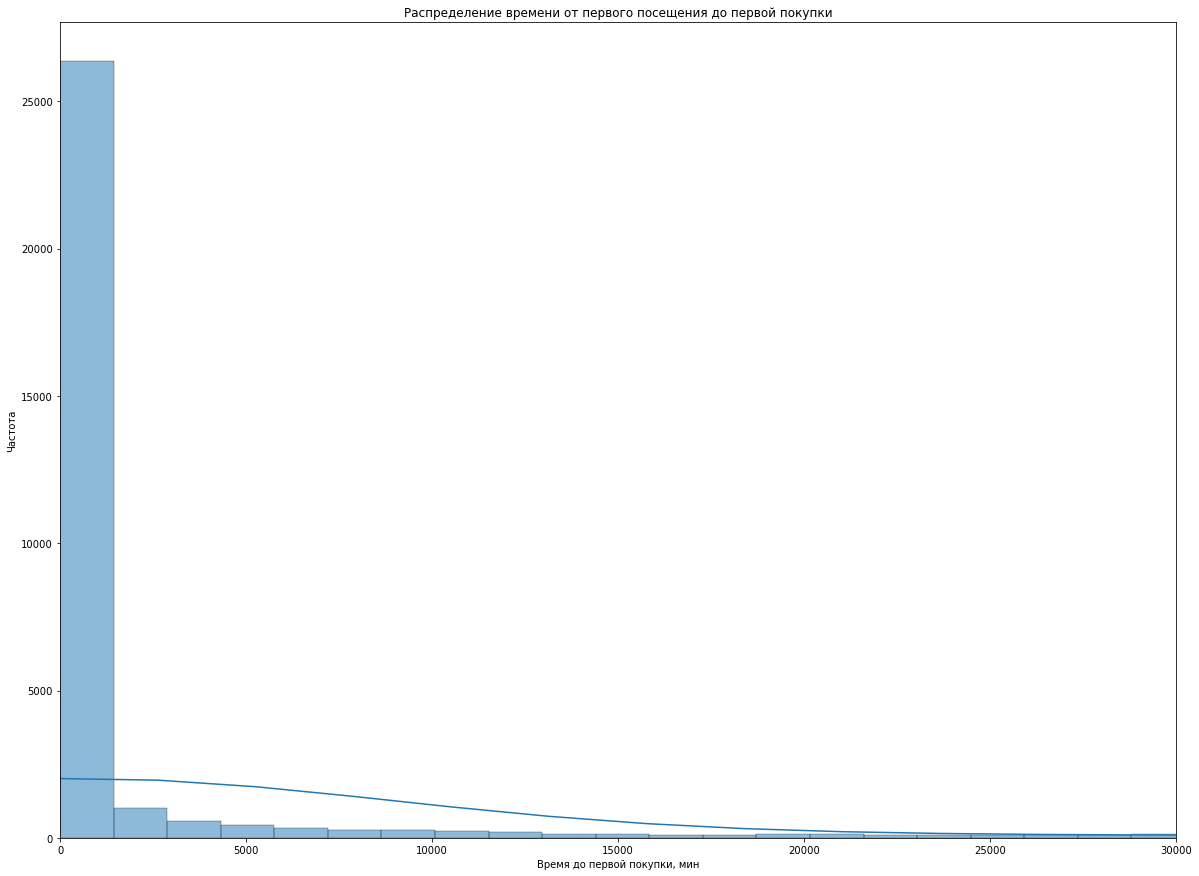

In [53]:
plt.figure(figsize=(20, 15))

g = sns.histplot(data = buyers, x='time_to_first_order_min', binwidth = 1440, kde = True)

g.set_title('Распределение времени от первого посещения до первой покупки')
g.set_ylabel('Частота')
g.set_xlabel('Время до первой покупки, мин')

plt.xlim(0, 30000)
plt.show()

In [54]:
print('Время от первого посещения до первой покупки:')
mean_time_to_first_order = buyers['time_to_first_order_min'].mean()
print('- среднее (мин):', mean_time_to_first_order)

median_time_to_first_order = buyers['time_to_first_order_min'].median()
print('- медиана (мин):', median_time_to_first_order)

moda_time_to_first_order = buyers['time_to_first_order_min'].mode()
print('- мода (мин):', moda_time_to_first_order)

Время от первого посещения до первой покупки:
- среднее (мин): 24340.842204698536
- медиана (мин): 16.0
- мода (мин): 0    1
dtype: int32


Медианнное время с момента первого визита до первой покупки составляет 16 минут и большинство покупок осуществляется в течение первого дня. Наиболее предпочтительно для клиентов совершить покупку сразу, это отражает мода = 1 мин. Также обращает на себя внимание то, что в имеющихся данных присутствует значительное количество покупок для которых время начала сессии равно времени покупки. Это может быть связано с использованием сторонних сервисов.

#### Cреднее количество покупок на одного покупателя за определённый период

Cформируем месячные когорты по покупкам, выделяя месяцы из дат датафрейма заказов:

In [55]:
df_orders['order_month'] = df_orders['buy_ts'].astype('datetime64[M]')

Добавим данные с датой заказа для каждого пользователя и приведем ее к типу данных datetime64 

In [56]:
df_orders['order_date'] = df_orders['buy_ts'].dt.date
df_orders['order_date'] = pd.to_datetime(df_orders['order_date'])
df_orders.head()

,buy_ts,revenue,uid,order_month,order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


Определим количество покупателей в каждой когорте, используя датасет *buyers*, сформированный в предыдущем пункте:

In [57]:
cohort_buyers = buyers.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_buyers.columns = ['first_order_month', 'n_buyers_cohorta']
display(cohort_buyers)

,first_order_month,n_buyers_cohorta
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


Объединим датасеты *df_orders* и *buyers* по покупателям, с последующей группировкой:

In [58]:
purchases = pd.merge(df_orders, buyers, how='inner', on='uid') \
              .groupby(['first_order_month', 'order_month']) \
              .agg({'revenue': 'count'}).reset_index() \
              .rename(columns = {'revenue': 'n_orders'}) 

purchases

,first_order_month,order_month,n_orders
0,2017-06-01,2017-06-01,2354
1,2017-06-01,2017-07-01,177
2,2017-06-01,2017-08-01,174
3,2017-06-01,2017-09-01,226
4,2017-06-01,2017-10-01,292
...,...,...,...
73,2018-03-01,2018-04-01,178
74,2018-03-01,2018-05-01,176
75,2018-04-01,2018-04-01,2495
76,2018-04-01,2018-05-01,195


Выделим "возраст" когорты покупателей:

In [59]:
purchases['cohort_lifetime'] = purchases['order_month'] - purchases['first_order_month']
purchases['cohort_lifetime'] = purchases['cohort_lifetime'] / np.timedelta64(1, 'M')
purchases['cohort_lifetime'] = purchases['cohort_lifetime'].round().astype('int')

In [60]:
purchases.head()

,first_order_month,order_month,n_orders,cohort_lifetime
0,2017-06-01,2017-06-01,2354,0
1,2017-06-01,2017-07-01,177,1
2,2017-06-01,2017-08-01,174,2
3,2017-06-01,2017-09-01,226,3
4,2017-06-01,2017-10-01,292,4


Путем объединения сформируем таблицу с информацией о количестве покупателей в каждой когорте и количестве совершенных ими покупок за период жизни каждой когорты:

In [61]:
purchases_report = pd.merge(cohort_buyers, purchases, on='first_order_month')
purchases_report.head()

,first_order_month,n_buyers_cohorta,order_month,n_orders,cohort_lifetime
0,2017-06-01,2023,2017-06-01,2354,0
1,2017-06-01,2023,2017-07-01,177,1
2,2017-06-01,2023,2017-08-01,174,2
3,2017-06-01,2023,2017-09-01,226,3
4,2017-06-01,2023,2017-10-01,292,4


Вычислим сколько покупок приходится на одного покупателя в определенных сроках жизни когорты:

In [62]:
purchases_report['orders_per_buyer'] = (purchases_report['n_orders'] / purchases_report['n_buyers_cohorta']).round(2)
purchases_report

,first_order_month,n_buyers_cohorta,order_month,n_orders,cohort_lifetime,orders_per_buyer
0,2017-06-01,2023,2017-06-01,2354,0,1.16
1,2017-06-01,2023,2017-07-01,177,1,0.09
2,2017-06-01,2023,2017-08-01,174,2,0.09
3,2017-06-01,2023,2017-09-01,226,3,0.11
4,2017-06-01,2023,2017-10-01,292,4,0.14
...,...,...,...,...,...,...
73,2018-03-01,3533,2018-04-01,178,1,0.05
74,2018-03-01,3533,2018-05-01,176,2,0.05
75,2018-04-01,2276,2018-04-01,2495,0,1.10
76,2018-04-01,2276,2018-05-01,195,1,0.09


Определим накопительную сумму покупок для каждого покупателя с течением "жизни" когорты и покажем ее с использованием heatmap библиотеки seaborn:

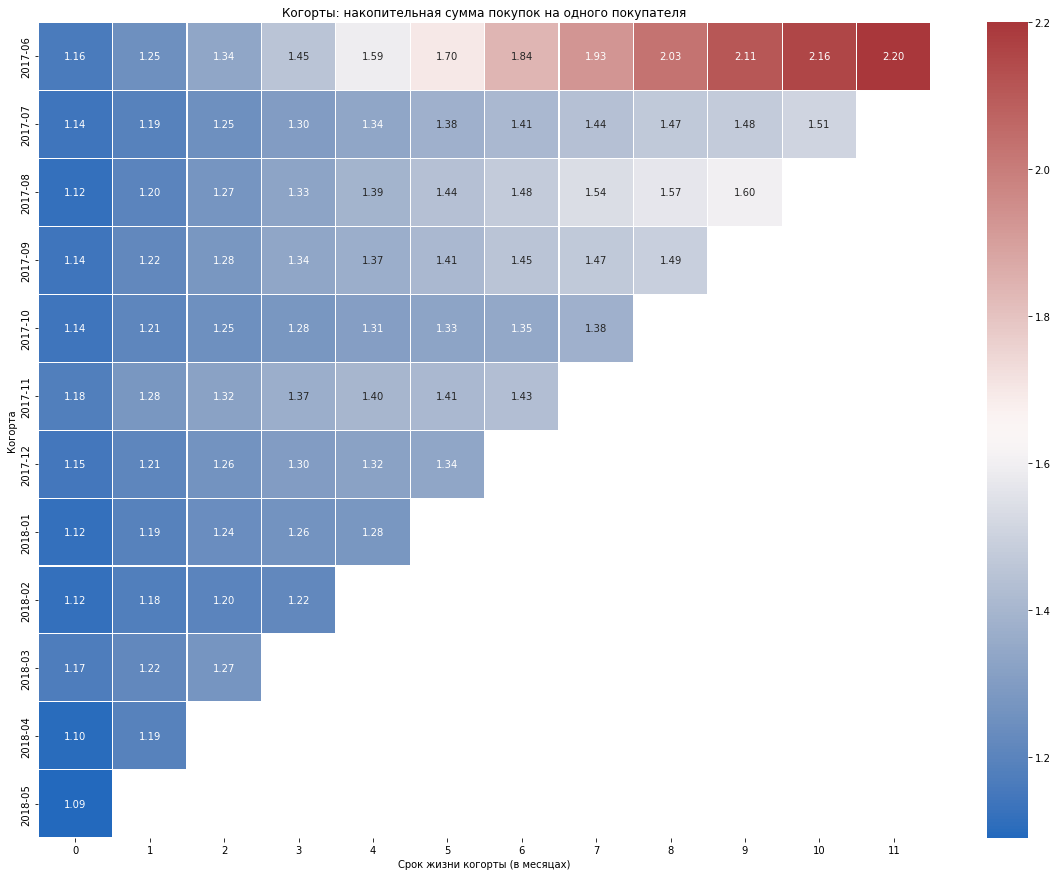

In [63]:
purchases_pivot = purchases_report.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='orders_per_buyer',
    aggfunc='sum'
).cumsum(axis=1)

yaxis_name = purchases_report['first_order_month'].unique().astype('datetime64[M]')

plt.figure(figsize=(20, 15))
g = sns.heatmap(purchases_pivot,
                annot=True,
                linewidths=.1,
                fmt='.2f', 
                cmap='vlag',
                yticklabels=yaxis_name
               );
g.set_title('Когорты: накопительная сумма покупок на одного покупателя')
g.set_ylabel('Когорта')
g.set_xlabel('Срок жизни когорты (в месяцах)')

plt.show()

Рассчитаем среднее количество покупок на одного покупателя за 6 месяцев:

In [64]:
print(round(purchases_pivot[5].mean(),2))

1.43


#### Ежемесячное количество и стоимость покупок. Cредний чек.

Рассчитаем суммарное количество покупок и выручку от ежемесячных продаж и вычислим средний чек: 

In [65]:
total_purchases_month = (df_orders
                     .groupby('order_month').agg({'buy_ts': 'count', 'uid': 'nunique', 'revenue': 'sum'}) \
                     .rename(columns = {'buy_ts': 'n_orders', 'uid': 'n_buyers'}) \
                     .reset_index())
total_purchases_month['purchases_per_buyer'] = (total_purchases_month['n_orders'] / total_purchases_month['n_buyers']).round(2)
total_purchases_month['mean_check_month'] = (total_purchases_month['revenue'] / total_purchases_month['n_orders']).round(2)

total_purchases_month

,order_month,n_orders,n_buyers,revenue,purchases_per_buyer,mean_check_month
0,2017-06-01,2354,2023,9557.49,1.16,4.06
1,2017-07-01,2363,1984,12539.47,1.19,5.31
2,2017-08-01,1807,1472,8758.78,1.23,4.85
3,2017-09-01,3387,2750,18345.51,1.23,5.42
4,2017-10-01,5679,4675,27987.70,1.21,4.93
5,2017-11-01,5659,4547,27069.93,1.24,4.78
6,2017-12-01,6218,4942,36388.60,1.26,5.85
7,2018-01-01,4721,3898,19417.13,1.21,4.11
8,2018-02-01,5281,4258,25560.54,1.24,4.84
9,2018-03-01,5326,4181,28834.59,1.27,5.41


In [66]:
print('Средний чек за весь изучаемый период (усл.ед.):', round(total_purchases_month['mean_check_month'].mean(), 2))

Средний чек за весь изучаемый период (усл.ед.): 4.96


Построим график, отражающий изменения метрики во времени:

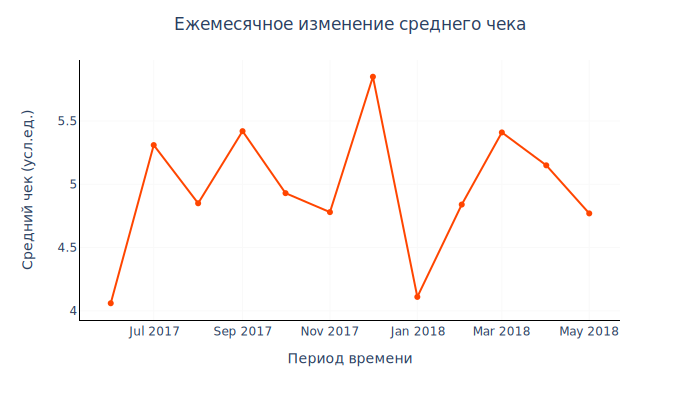

In [67]:
fig = px.line(
    total_purchases_month,
    x="order_month",
    y="mean_check_month",
    height = 400
)
fig.update_traces(line_color='#ff4500', mode='lines+markers')
fig.update_xaxes(showline=True, linewidth=1, linecolor='black', gridcolor='#f9f9f9')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', gridcolor='#f9f9f9')

fig.update_layout(title='Ежемесячное изменение среднего чека',
                  xaxis_title='Период времени',
                  yaxis_title='Средний чек (усл.ед.)',
                  plot_bgcolor='#ffffff')
fig.update(layout=dict(title=dict(x=0.5)))
fig.show()
fig.write_html("C:/Users/77776/Desktop/file.html")

Из графика видно, что средний чек в течение года колеблется в интервале от 4 до 6 усл. ед.

Для более оперативного отслеживания размера среднего чека можно использовать еженедельную метрику:

In [68]:
df_orders['order_week'] = df_orders['buy_ts'].astype('datetime64[W]')

In [69]:
total_purchases_week = (df_orders
                     .groupby('order_week').agg({'buy_ts': 'count', 'uid': 'nunique', 'revenue': 'sum'}) \
                     .rename(columns = {'buy_ts': 'n_orders', 'uid': 'n_buyers_week'}) \
                     .reset_index())
total_purchases_week['purchases_per_buyer'] = (total_purchases_week['n_orders'] / total_purchases_week['n_buyers_week']).round(2)
total_purchases_week['mean_check_week'] = (total_purchases_week['revenue'] / total_purchases_week['n_orders']).round(2)

total_purchases_week.head()

,order_week,n_orders,n_buyers_week,revenue,purchases_per_buyer,mean_check_week
0,2017-06-01,896,774,2546.66,1.16,2.84
1,2017-06-08,525,478,2536.51,1.10,4.83
2,2017-06-15,341,310,1527.33,1.10,4.48
3,2017-06-22,441,396,2099.22,1.11,4.76
4,2017-06-29,461,416,2449.82,1.11,5.31


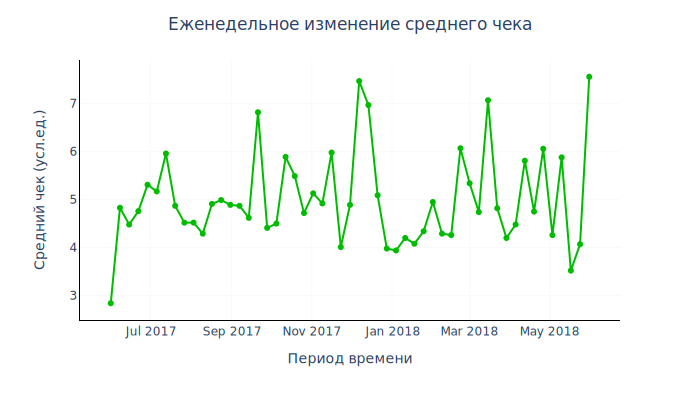

In [70]:
fig = px.line(
    total_purchases_week,
    x="order_week",
    y="mean_check_week",
    height = 400
)
fig.update_traces(line_color='#00bc00', mode='lines+markers')
fig.update_xaxes(showline=True, linewidth=1, linecolor='black', gridcolor='#f9f9f9')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', gridcolor='#f9f9f9')

fig.update_layout(title='Еженедельное изменение среднего чека',
                  xaxis_title='Период времени',
                  yaxis_title='Средний чек (усл.ед.)',
                  plot_bgcolor='#ffffff'
                 )
fig.update(layout=dict(title=dict(x=0.5)))
fig.show()

Еженедельное изменение среднего чека отражает более сильные колебания в сравнении с ежемесячным.

#### «Пожизненная» ценность клиента (метрика LTV)

LTV (от англ. lifetime value) — «пожизненная» ценность клиента. Это — итоговая сумма денег, которую один клиент приносит в среднем со всех своих покупок. При расчёте LTV обычно обращаются к валовой прибыли с клиента за период. Метрика является накопительной.

За основу расчета возьмем ранее сформированный датасет *buyers*

In [71]:
buyers.head()

,uid,first_session_time,first_session_month,first_session_date,first_order_time,first_order_date,first_order_month,time_to_first_order,time_to_first_order_min
0,313578113262317,2017-09-18 22:49:00,2017-09-01,2017-09-18,2018-01-03 21:51:00,2018-01-03,2018-01-01,106 days 23:02:00,154022
1,1575281904278712,2017-06-03 10:13:00,2017-06-01,2017-06-03,2017-06-03 10:13:00,2017-06-03,2017-06-01,0 days 00:00:00,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-01,2017-10-11,2017-10-11 18:33:00,2017-10-11,2017-10-01,0 days 01:19:00,79
3,2464366381792757,2018-01-27 20:10:00,2018-01-01,2018-01-27,2018-01-28 15:54:00,2018-01-28,2018-01-01,0 days 19:44:00,1184
4,2551852515556206,2017-11-24 10:14:00,2017-11-01,2017-11-24,2017-11-24 10:14:00,2017-11-24,2017-11-01,0 days 00:00:00,0


Посчитаем количество покупателей в каждой когорте, сформированной по месяцу первой покупки:

In [72]:
cohort_sizes = (buyers.groupby('first_order_month') \
                .agg({'uid': 'nunique'}) \
                .reset_index()
               )
cohort_sizes.columns = ['first_order_month', 'n_buyers']
display(cohort_sizes.head())

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


Сформируем таблицу, содержащую в себе информацию о месяце первой покупки, месяце последующих покупок и выручке:

In [73]:
cohorts_ltv = pd.merge(df_orders, buyers, how='inner', on='uid') \
                .groupby(['first_order_month', 'order_month']) \
                .agg({'revenue': 'sum'}) \
                .reset_index()
cohorts_ltv

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
...,...,...,...
73,2018-03-01,2018-04-01,1063.05
74,2018-03-01,2018-05-01,1114.87
75,2018-04-01,2018-04-01,10600.69
76,2018-04-01,2018-05-01,1209.92


Добавим в таблицу *cohorts_ltv* данные о том, сколько людей первый раз совершили покупку в каждый месяц:

In [74]:
report = pd.merge(cohort_sizes, cohorts_ltv, on='first_order_month')
display(report.head()) 

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


Следует отметить, что LTV считается из валовой прибыли компании. В связи с тем, что у нас имеются только данные по выручке, а себестоимость неизвестна, в качестве допущения (из условия задания) примем маржинальность = 1.

In [75]:
margin_rate = 1
report['gp'] = report['revenue'] * margin_rate

report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

In [76]:
report.head()

,first_order_month,n_buyers,order_month,revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4


Найдём выручку на одного покупателя, разделив валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте. Сформируем сводную таблицу по среднему LTV когорт для каждого месяца "жизни":

In [77]:
report['revenue_per_buyer'] = (report['gp'] / report['n_buyers']).round(2)
report.head()

,first_order_month,n_buyers,order_month,revenue,gp,age,revenue_per_buyer
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.72
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.49
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.44
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.95
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.02


Определим LTV для каждой когорты из условия, что метрика является накопительной:

In [78]:
output = report.pivot_table(
    index='first_order_month', columns='age', values='revenue_per_buyer', aggfunc='mean'
).round(2).cumsum(axis=1)

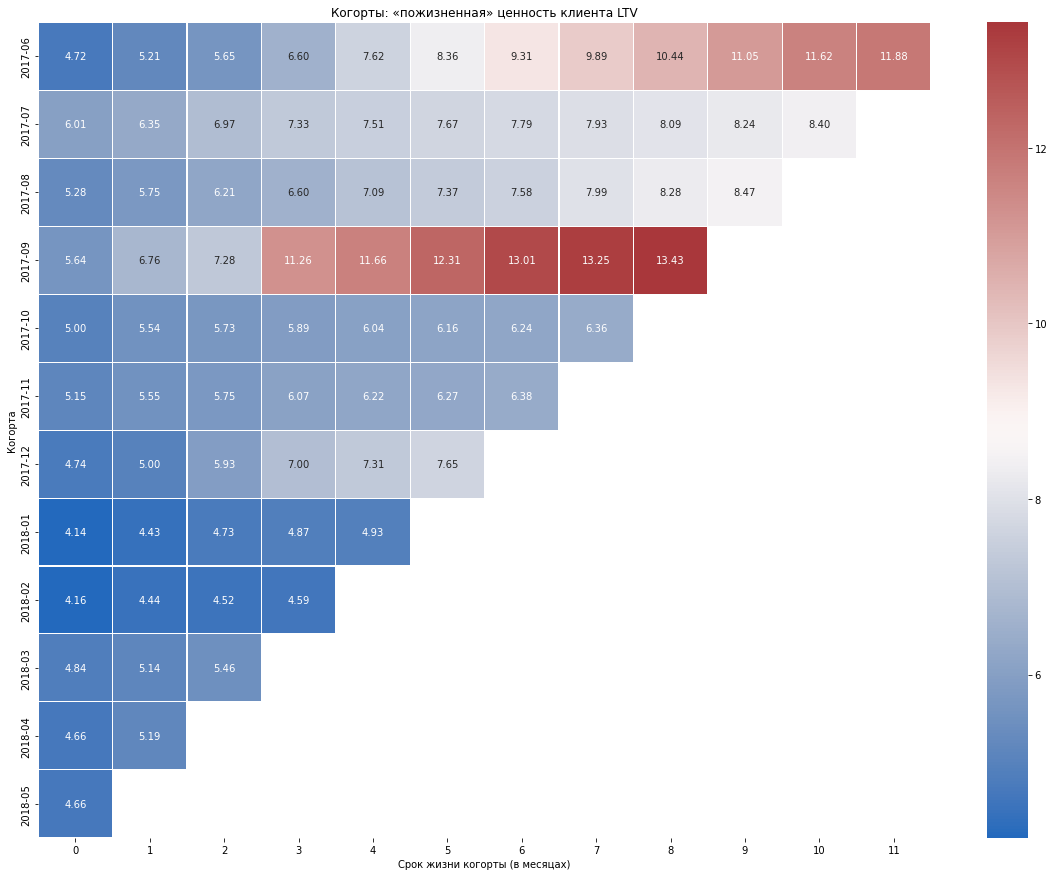

In [79]:
plt.figure(figsize=(20, 15))

yaxis_name = report['first_order_month'].unique().astype('datetime64[M]')

g = sns.heatmap(output,
                annot=True, 
                linewidths=.1, fmt='.2f', 
                cmap='vlag',
                yticklabels=yaxis_name
               )
g.set_title('Когорты: «пожизненная» ценность клиента LTV')
g.set_ylabel('Когорта')
g.set_xlabel('Срок жизни когорты (в месяцах)')

plt.show()

Рассчитаем итоговый LTV по когортам "возрастом" 6 месяцев:

In [80]:
output.head(7).fillna('').style.set_properties(**{'background-color': 'yellow'}, subset=[5])

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01 00:00:00,4.720000,5.210000,5.650000,6.600000,7.620000,8.360000,9.310000,9.890000,10.440000,11.050000,11.620000,11.880000
2017-07-01 00:00:00,6.010000,6.350000,6.970000,7.330000,7.510000,7.670000,7.790000,7.930000,8.090000,8.240000,8.400000,
2017-08-01 00:00:00,5.280000,5.750000,6.210000,6.600000,7.090000,7.370000,7.580000,7.990000,8.280000,8.470000,,
2017-09-01 00:00:00,5.640000,6.760000,7.280000,11.260000,11.660000,12.310000,13.010000,13.250000,13.430000,,,
2017-10-01 00:00:00,5.000000,5.540000,5.730000,5.890000,6.040000,6.160000,6.240000,6.360000,,,,
2017-11-01 00:00:00,5.150000,5.550000,5.750000,6.070000,6.220000,6.270000,6.380000,,,,,
2017-12-01 00:00:00,4.740000,5.000000,5.930000,7.000000,7.310000,7.650000,,,,,,


Среднее значение LTV для когорт "возрастом" 6 месяцев равно:

In [81]:
print(round(output[5].mean(), 2))

7.97


#### Промежуточные выводы

- Медианное время от первого посещения покупателем сайта до совершения первой покупки равно 16 мин. Наиболее часто встречаемое значение от визита до покупки: 1 минута. Обращает на себя внимание то, что присутствует значительное количество покупок для которых время начала сессии равно времени покупки.
- Наибольшее число покупателей было зафиксировано в декабрьской когорте 2017 г. – 4383 чел.
- Наибольшая накопительная сумма покупок на одного покупателя за полугодовой период была получена для когорты, совершившей первую покупку в июне 2017 г.: 1.7 покупок.
- Среднее количество покупок на одного покупателя за 6 месяцев составляет 1.43 покупки.
- Средний чек за весь изучаемый период равен 4.84 усл. ед. Средний чек в течение года колеблется в интервале от 4 до 6 усл. ед. (по средним месячным значениям).
- Среднее значение LTV для когорт "возрастом" 6 месяцев равно 7.97 усл.ед. При этом итоговая сумма денег, которую один клиент принес в среднем со всех своих покупок за 6 месяцев максимальна для сентябрьской когорты 2017 г. и ее LTV составляет 12.31 усл.ед. 

### Расчет маркетинговых метрик

#### Общая сумма расходов на маркетинг и распределение трат по источникам перехода на сайт

Определим общую сумму расходов на маркетинг, используя соответствующую статью расхода датасета *df_costs*:

In [82]:
marketing_costs_total = df_costs['costs'].sum()
print('Общая сумма расходов на маркетинг (усл.ед.):', marketing_costs_total)

Общая сумма расходов на маркетинг (усл.ед.): 329131.62


Определим расходы на маркетинг по источникам перехода на сайт и визуализируем полученные данные:

In [83]:
marketing_sources = df_costs.groupby('source_id').agg({'costs': 'sum'}).reset_index()

In [84]:
def annotation_graphs(graph, layout='h'):
    '''Функция добавляет аннотацию значений на графики в зависимости от горизонтальной (h) или 
    вертикальной (v) ориентации столбцов барплота'''
    if layout == 'h':
        for p in graph.patches:
            graph.annotate(format(p.get_width(), '.1f'), 
                           (p.get_x() + p.get_width() + 3, p.get_y() + p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 9), 
                           textcoords = 'offset points')
    else: 
        for p in g.patches:
            g.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points') 

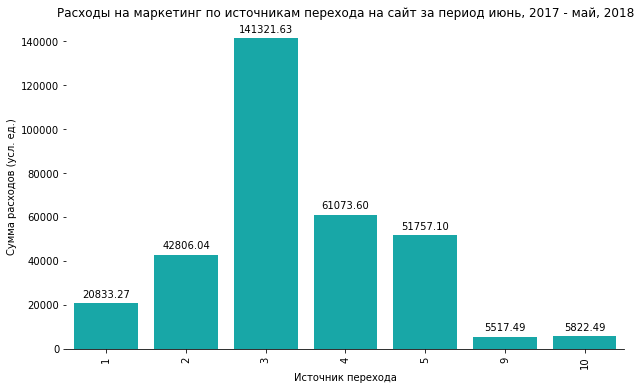

In [85]:
plt.figure(figsize=(10, 6))

g = sns.barplot(x='source_id', y='costs', data = marketing_sources, color = 'c')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Расходы на маркетинг по источникам перехода на сайт за период июнь, 2017 - май, 2018')
g.set_ylabel('Сумма расходов (усл. ед.)')
g.set_xlabel('Источник перехода')
sns.despine(left=True, bottom=False, right=True)

# Аннотация и вывод графика
annotation_graphs(g, 'v')
plt.show()

Максимальные расходы на маркетинг отводятся третьему источнику. Минимальные - источнику 9.

#### Динамика изменения расходов во времени

Выделим ежемесячные расходы на маркетинг и проследим динамику их изменения:

In [86]:
df_costs['month'] = df_costs['date'].astype('datetime64[M]')
df_costs.head()

,source_id,date,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [87]:
monthly_costs_total = df_costs.groupby('month').agg({'costs': 'sum'}).reset_index()
monthly_costs_total

,month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


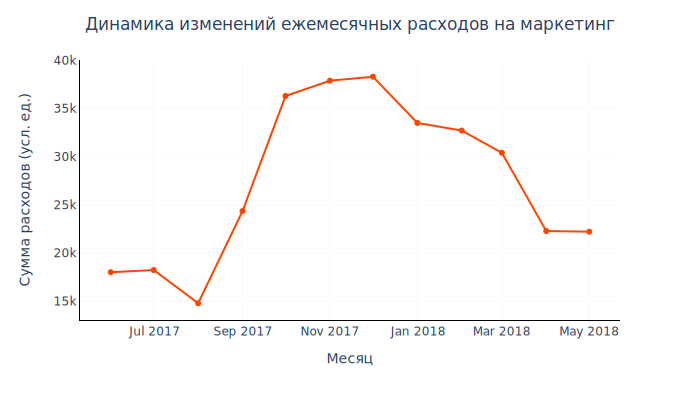

In [88]:
fig = px.line(
    monthly_costs_total,
    x="month",
    y="costs",
    height = 400
)
fig.update_traces(line_color='#ff4500', mode='lines+markers')
fig.update_xaxes(showline=True, linewidth=1, linecolor='black', gridcolor='#f9f9f9')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', gridcolor='#f9f9f9')

fig.update_layout(title='Динамика изменений ежемесячных расходов на маркетинг',
                  xaxis_title='Месяц',
                  yaxis_title='Сумма расходов (усл. ед.)',
                  plot_bgcolor='#ffffff'
                 )
fig.update(layout=dict(title=dict(x=0.5)))
fig.show()

Расходы на маркетинг начинают увеличиваться с августа 2017 г., достигают своего максимума в декабре 2017 г, и постепенно снижаются к маю 2018 г.

Определим динамику изменений ежемесячных расходов на маркетинг для каждого источника трафика:

In [89]:
costs_source = df_costs.groupby(['month', 'source_id']).agg({'costs': 'sum'}).reset_index()
costs_source

,month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12
...,...,...,...
79,2018-05-01,3,9411.42
80,2018-05-01,4,4214.21
81,2018-05-01,5,3669.56
82,2018-05-01,9,362.17


Более наглядный вариант представить расходы каждый месяц по источникам трафика с использованием *pivot_table*: 

In [90]:
costs_pivot = df_costs.pivot_table(
                    index = 'month',
                    columns = 'source_id',
                    values = 'costs',
                    aggfunc = 'sum'
).reset_index()

costs_pivot

source_id,month,1,2,3,4,5,9,10
0,2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
1,2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2,2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
3,2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
4,2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
5,2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
6,2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
7,2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
8,2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88
9,2018-03-01,1893.09,3943.14,13080.85,5961.87,4529.62,480.29,526.41


Визуализируем изменения в расходах по источникам трафика во времени:

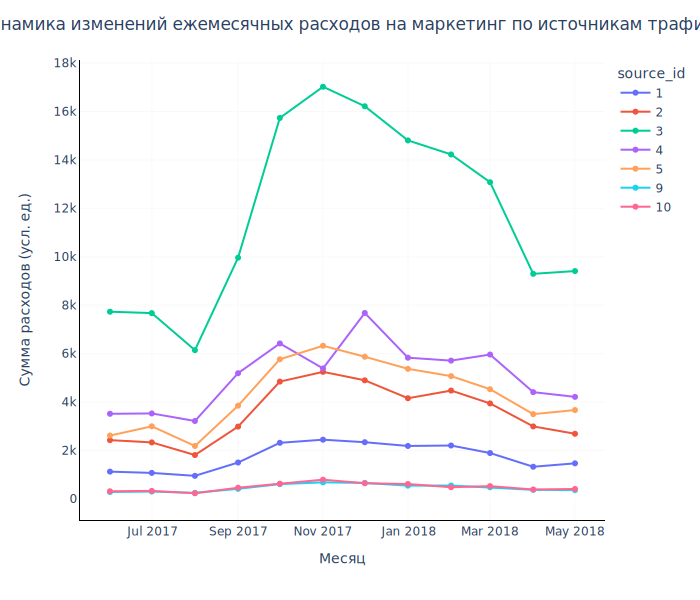

In [91]:
fig = px.line(
    costs_source,
    x="month",
    y="costs",
    color='source_id',
    height = 600
)
fig.update_traces(mode='lines+markers')
fig.update_xaxes(showline=True, linewidth=1, linecolor='black', gridcolor='#f9f9f9')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', gridcolor='#f9f9f9')

fig.update_layout(title='Динамика изменений ежемесячных расходов на маркетинг по источникам трафика',
                  xaxis_title='Месяц',
                  yaxis_title='Сумма расходов (усл. ед.)',
                  plot_bgcolor='#ffffff'
                 )
fig.update(layout=dict(title=dict(x=0.5)))

fig.show()

Из графика видно, что увеличение расходов на маркетинг начинается с августа 2017 г., но по источнику трафика 3 темпы расходов гораздо выше, чем по остальным источникам.

#### Стоимость привлечения клиента (метрика САС)

**(1) Определим стоимость привлечения клиента для всего проекта:**

In [92]:
# расчет суммарных расходов за весь период 
costs_sum = df_costs['costs'].sum()

# расчет числа уникальных покупок
orders_n_unique = df_orders['uid'].nunique()

# расчет сас для всего проекта
print((costs_sum / orders_n_unique).round(2))

9.01


**(2) Рассчитаем средний САС по месяцам на покупателя:**

Отобразим первые две строки датасета с расходами на маркетинг:

In [93]:
df_costs.head(2)

,source_id,date,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01


Сформируем таблицу с месячными расходами на маркетинг:

In [94]:
costs_month = df_costs.groupby('month').agg({'costs' : 'sum'}).reset_index()
costs_month

,month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


Отобразим первые две строки датасета с информацией о покупателях:

In [95]:
buyers.head(2)

,uid,first_session_time,first_session_month,first_session_date,first_order_time,first_order_date,first_order_month,time_to_first_order,time_to_first_order_min
0,313578113262317,2017-09-18 22:49:00,2017-09-01,2017-09-18,2018-01-03 21:51:00,2018-01-03,2018-01-01,106 days 23:02:00,154022
1,1575281904278712,2017-06-03 10:13:00,2017-06-01,2017-06-03,2017-06-03 10:13:00,2017-06-03,2017-06-01,0 days 00:00:00,0


Сформируем таблицу с количеством уникальных покупателей по месяцу совершения первой покупки:

In [96]:
first_time_buyers_month = buyers.groupby('first_order_month').agg({'uid' : 'nunique'}).reset_index()
first_time_buyers_month.columns = ['first_order_month', 'n_buyers']
first_time_buyers_month

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


Объединим данные таблицы месячных расходов на маркетинг с количеством уникальных покупателей за этот же период:

In [97]:
cac_month = pd.merge(costs_month, first_time_buyers_month, left_on = 'month', right_on = 'first_order_month')
cac_month

,month,costs,first_order_month,n_buyers
0,2017-06-01,18015.00,2017-06-01,2023
1,2017-07-01,18240.59,2017-07-01,1923
2,2017-08-01,14790.54,2017-08-01,1370
3,2017-09-01,24368.91,2017-09-01,2581
4,2017-10-01,36322.88,2017-10-01,4340
5,2017-11-01,37907.88,2017-11-01,4081
6,2017-12-01,38315.35,2017-12-01,4383
7,2018-01-01,33518.52,2018-01-01,3373
8,2018-02-01,32723.03,2018-02-01,3651
9,2018-03-01,30415.27,2018-03-01,3533


Рассчитаем средний САС для получившейся таблицы по месяцам на покупателя:

In [98]:
cac_month['cac'] = (cac_month['costs'] / cac_month['n_buyers']).round(2)
cac_month

,month,costs,first_order_month,n_buyers,cac
0,2017-06-01,18015.00,2017-06-01,2023,8.91
1,2017-07-01,18240.59,2017-07-01,1923,9.49
2,2017-08-01,14790.54,2017-08-01,1370,10.80
3,2017-09-01,24368.91,2017-09-01,2581,9.44
4,2017-10-01,36322.88,2017-10-01,4340,8.37
5,2017-11-01,37907.88,2017-11-01,4081,9.29
6,2017-12-01,38315.35,2017-12-01,4383,8.74
7,2018-01-01,33518.52,2018-01-01,3373,9.94
8,2018-02-01,32723.03,2018-02-01,3651,8.96
9,2018-03-01,30415.27,2018-03-01,3533,8.61


Отразим ежемесячное изменение САС на графике:

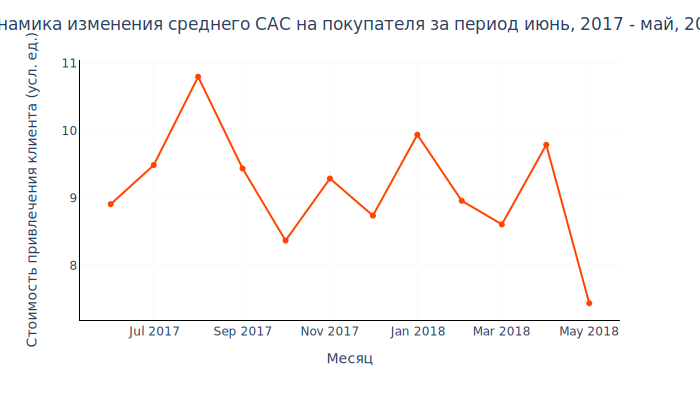

In [99]:
fig = px.line(
    cac_month,
    x="month",
    y="cac",
    height = 400
)
fig.update_traces(line_color='#ff4500', mode='lines+markers')
fig.update_xaxes(showline=True, linewidth=1, linecolor='black', gridcolor='#f9f9f9')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', gridcolor='#f9f9f9')

fig.update_layout(title='Динамика изменения среднего CAC на покупателя за период июнь, 2017 - май, 2018',
                  xaxis_title='Месяц',
                  yaxis_title='Стоимость привлечения клиента (усл. ед.)',
                  plot_bgcolor='#ffffff'
                 )
fig.update(layout=dict(title=dict(x=0.5)))
fig.show()

Динамика изменения среднего CAC на покупателя за период июнь, 2017 г. - май, 2018 г. демонстрирует нисходящий тренд, что является хорошим показателем.

**(3) Рассчитаем средний CAC на одного покупателя для каждого источника трафика:**

Ежемесячные расходы на маркетинг по источнику трафика:

In [100]:
costs_source

,month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12
...,...,...,...
79,2018-05-01,3,9411.42
80,2018-05-01,4,4214.21
81,2018-05-01,5,3669.56
82,2018-05-01,9,362.17


Сформируем датасет, включающий данные о первой сессии и с какого источника трафика она была совершена:

In [101]:
users = df_visits.sort_values('start_ts').groupby('uid').first().reset_index()
users

,uid,device,end_ts,source_id,start_ts,session_date,session_week,session_month,session_duration_sec
0,11863502262781,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,2018-03-01,2018-03-01,2018-03-01,360
1,49537067089222,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2018-02-06,2018-02-01,2018-02-01,120
2,297729379853735,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,2017-06-07,2017-06-01,2017-06-01,60
3,313578113262317,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01,1080
4,325320750514679,desktop,2017-09-30 14:38:00,5,2017-09-30 14:29:00,2017-09-30,2017-09-28,2017-09-01,540
...,...,...,...,...,...,...,...,...,...
228164,18446403737806311543,desktop,2017-11-30 03:39:00,5,2017-11-30 03:36:00,2017-11-30,2017-11-30,2017-11-01,180
228165,18446424184725333426,touch,2017-12-06 20:32:00,4,2017-12-06 20:32:00,2017-12-06,2017-11-30,2017-12-01,0
228166,18446556406699109058,touch,2018-01-01 16:31:00,3,2018-01-01 16:29:00,2018-01-01,2017-12-28,2018-01-01,120
228167,18446621818809592527,desktop,2017-12-27 14:08:00,4,2017-12-27 13:27:00,2017-12-27,2017-12-21,2017-12-01,2460


Определим количество уникальных посетителей по источникам трафика в месяц: 

In [102]:
users_source = users.groupby(['session_month', 'source_id']) \
                                        .agg({'uid' : 'nunique'}).reset_index()
users_source.columns = ['month', 'source_id', 'n_visitors']
users_source

,month,source_id,n_visitors
0,2017-06-01,1,631
1,2017-06-01,2,1262
2,2017-06-01,3,4080
3,2017-06-01,4,3447
4,2017-06-01,5,2728
...,...,...,...
93,2018-05-01,4,5278
94,2018-05-01,5,2972
95,2018-05-01,7,2
96,2018-05-01,9,314


In [103]:
n_visitors_source = users_source.groupby('source_id').agg({'n_visitors':'sum'}).reset_index()
n_visitors_source

,source_id,n_visitors
0,1,9469
1,2,17616
2,3,66116
3,4,72346
4,5,49237
5,6,2
6,7,32
7,9,6448
8,10,6903


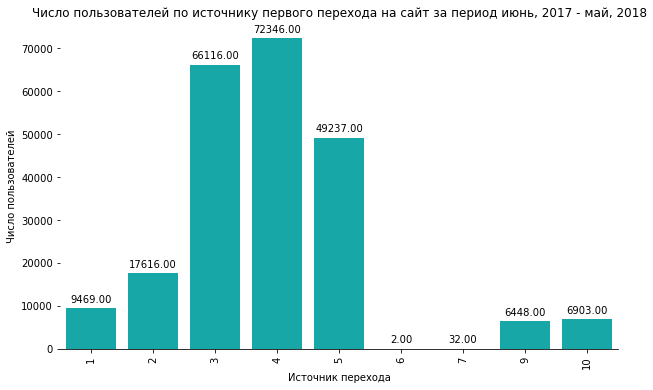

In [104]:
plt.figure(figsize=(10, 6))

g = sns.barplot(x='source_id', y='n_visitors', data = n_visitors_source, color = 'c')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Число пользователей по источнику первого перехода на сайт за период июнь, 2017 - май, 2018')
g.set_ylabel('Число пользователей')
g.set_xlabel('Источник перехода')
sns.despine(left=True, bottom=False, right=True)

# Аннотация и вывод графика
annotation_graphs(g, 'v')
plt.show()

Из диаграммы видно, что основными источниками перехода пользователей являются 3, 4, 5. Вместе с тем, источник 4 обеспечивает большее привлечение пользователей, чем источник 3 при меньших затратах на маркетинг.    

Сформируем датасет, включающий данные о первой покупке:

In [105]:
first_orders

,uid,first_order_time,first_order_date,first_order_month
0,313578113262317,2018-01-03 21:51:00,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11 18:33:00,2017-10-11,2017-10-01
3,2464366381792757,2018-01-28 15:54:00,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01
...,...,...,...,...
36517,18445147675727495770,2017-11-24 09:03:00,2017-11-24,2017-11-01
36518,18445407535914413204,2017-09-22 23:55:00,2017-09-22,2017-09-01
36519,18445601152732270159,2018-03-26 22:54:00,2018-03-26,2018-03-01
36520,18446156210226471712,2018-02-18 19:34:00,2018-02-18,2018-02-01


Объединим данные о первой покупке с данными о первой сессии для каждого пользователя:

In [106]:
buyers_source = pd.merge(first_orders, users, on='uid')
buyers_source

,uid,first_order_time,first_order_date,first_order_month,device,end_ts,source_id,start_ts,session_date,session_week,session_month,session_duration_sec
0,313578113262317,2018-01-03 21:51:00,2018-01-03,2018-01-01,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01,1080
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,touch,2017-06-03 10:17:00,10,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,240
2,2429014661409475,2017-10-11 18:33:00,2017-10-11,2017-10-01,desktop,2017-10-11 17:27:00,3,2017-10-11 17:14:00,2017-10-11,2017-10-05,2017-10-01,780
3,2464366381792757,2018-01-28 15:54:00,2018-01-28,2018-01-01,desktop,2018-01-27 20:13:00,5,2018-01-27 20:10:00,2018-01-27,2018-01-25,2018-01-01,180
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,desktop,2017-11-24 10:14:19,5,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,19
...,...,...,...,...,...,...,...,...,...,...,...,...
36517,18445147675727495770,2017-11-24 09:03:00,2017-11-24,2017-11-01,touch,2017-08-20 13:30:00,5,2017-08-20 13:30:00,2017-08-20,2017-08-17,2017-08-01,0
36518,18445407535914413204,2017-09-22 23:55:00,2017-09-22,2017-09-01,desktop,2017-09-22 23:55:00,3,2017-09-22 23:48:00,2017-09-22,2017-09-21,2017-09-01,420
36519,18445601152732270159,2018-03-26 22:54:00,2018-03-26,2018-03-01,desktop,2017-08-07 11:52:00,2,2017-08-07 11:51:00,2017-08-07,2017-08-03,2017-08-01,60
36520,18446156210226471712,2018-02-18 19:34:00,2018-02-18,2018-02-01,desktop,2017-11-07 10:04:00,3,2017-11-07 10:01:00,2017-11-07,2017-11-02,2017-11-01,180


Определим число уникальных покупателей по месяцу первой покупки и источнику трафика:

In [107]:
first_time_buyers_source = buyers_source.groupby(['first_order_month', 'source_id']) \
                                        .agg({'uid' : 'nunique'}).reset_index()
first_time_buyers_source.columns = ['month', 'source_id', 'n_buyers']
first_time_buyers_source

,month,source_id,n_buyers
0,2017-06-01,1,190
1,2017-06-01,2,235
2,2017-06-01,3,638
3,2017-06-01,4,413
4,2017-06-01,5,384
...,...,...,...
80,2018-05-01,3,844
81,2018-05-01,4,804
82,2018-05-01,5,497
83,2018-05-01,9,60


Объединим данные с информацией о ежемесячном расходе средств на маркетинг costs_source с данными о количестве уникальных покупателей по источнику трафика first_time_buyers_source:

In [108]:
cac_buyers_source = pd.merge(costs_source, first_time_buyers_source, on =['month', 'source_id'])
cac_buyers_source

,month,source_id,costs,n_buyers
0,2017-06-01,1,1125.61,190
1,2017-06-01,2,2427.38,235
2,2017-06-01,3,7731.65,638
3,2017-06-01,4,3514.80,413
4,2017-06-01,5,2616.12,384
...,...,...,...,...
79,2018-05-01,3,9411.42,844
80,2018-05-01,4,4214.21,804
81,2018-05-01,5,3669.56,497
82,2018-05-01,9,362.17,60


Рассчитаем метрику CAC по источнику трафика:

In [109]:
cac_buyers_source['cac_source'] = (cac_buyers_source['costs'] / cac_buyers_source['n_buyers']).round(2)
cac_buyers_source

,month,source_id,costs,n_buyers,cac_source
0,2017-06-01,1,1125.61,190,5.92
1,2017-06-01,2,2427.38,235,10.33
2,2017-06-01,3,7731.65,638,12.12
3,2017-06-01,4,3514.80,413,8.51
4,2017-06-01,5,2616.12,384,6.81
...,...,...,...,...,...
79,2018-05-01,3,9411.42,844,11.15
80,2018-05-01,4,4214.21,804,5.24
81,2018-05-01,5,3669.56,497,7.38
82,2018-05-01,9,362.17,60,6.04


Рассчитаем средний САС по источнику трафика за весь период:

In [110]:
cac_source_mean = cac_buyers_source.groupby('source_id').agg({'cac_source': 'mean'}) \
                                                        .round(2) \
                                                        .sort_values(by = 'cac_source', ascending = False)
cac_source_mean

,cac_source
source_id,
3,13.80
2,12.50
5,7.45
1,7.21
4,6.44
9,5.42
10,4.87


Изменение САС на одного покупателя во времени по источнику трафика представлено на графике:

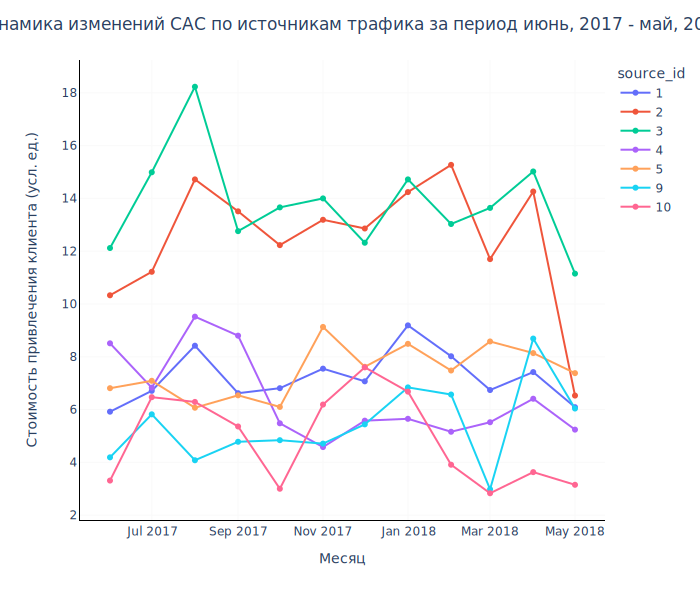

In [111]:
fig = px.line(
    cac_buyers_source,
    x="month",
    y="cac_source",
    color='source_id',
    height = 600
)
fig.update_traces(mode='lines+markers')
fig.update_xaxes(showline=True, linewidth=1, linecolor='black', gridcolor='#f9f9f9')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', gridcolor='#f9f9f9')

fig.update_layout(title='Динамика изменений CAC по источникам трафика за период июнь, 2017 - май, 2018',
                  xaxis_title='Месяц',
                  yaxis_title='Стоимость привлечения клиента (усл. ед.)',
                  plot_bgcolor='#ffffff'
                 )
fig.update(layout=dict(title=dict(x=0.5)))

fig.show()

Из графика видно, что несмотря на максимально большие расходы на маркетинг по источнику 3, стоимость привлечения клиента по нему максимальна. В следующем пункте проверитм, насколько оправдано было выделять такой объем средств для этого источника.

#### Расчет ROMI по когортам в разрезе источников

Метрика ROMI определяется из отношения LTV / CAC. LTV для каждого источника определяется из таблицы *buyers_source*, включающей всю необходимую информацию для формирования когорт покупателей и идентификатор источника трафика:

In [112]:
buyers_source

,uid,first_order_time,first_order_date,first_order_month,device,end_ts,source_id,start_ts,session_date,session_week,session_month,session_duration_sec
0,313578113262317,2018-01-03 21:51:00,2018-01-03,2018-01-01,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01,1080
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,touch,2017-06-03 10:17:00,10,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,240
2,2429014661409475,2017-10-11 18:33:00,2017-10-11,2017-10-01,desktop,2017-10-11 17:27:00,3,2017-10-11 17:14:00,2017-10-11,2017-10-05,2017-10-01,780
3,2464366381792757,2018-01-28 15:54:00,2018-01-28,2018-01-01,desktop,2018-01-27 20:13:00,5,2018-01-27 20:10:00,2018-01-27,2018-01-25,2018-01-01,180
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,desktop,2017-11-24 10:14:19,5,2017-11-24 10:14:00,2017-11-24,2017-11-23,2017-11-01,19
...,...,...,...,...,...,...,...,...,...,...,...,...
36517,18445147675727495770,2017-11-24 09:03:00,2017-11-24,2017-11-01,touch,2017-08-20 13:30:00,5,2017-08-20 13:30:00,2017-08-20,2017-08-17,2017-08-01,0
36518,18445407535914413204,2017-09-22 23:55:00,2017-09-22,2017-09-01,desktop,2017-09-22 23:55:00,3,2017-09-22 23:48:00,2017-09-22,2017-09-21,2017-09-01,420
36519,18445601152732270159,2018-03-26 22:54:00,2018-03-26,2018-03-01,desktop,2017-08-07 11:52:00,2,2017-08-07 11:51:00,2017-08-07,2017-08-03,2017-08-01,60
36520,18446156210226471712,2018-02-18 19:34:00,2018-02-18,2018-02-01,desktop,2017-11-07 10:04:00,3,2017-11-07 10:01:00,2017-11-07,2017-11-02,2017-11-01,180


Сделаем срез данных по источникам трафика в цикле и рассчитаем ROMI:

ROMI для источника трафика 1:


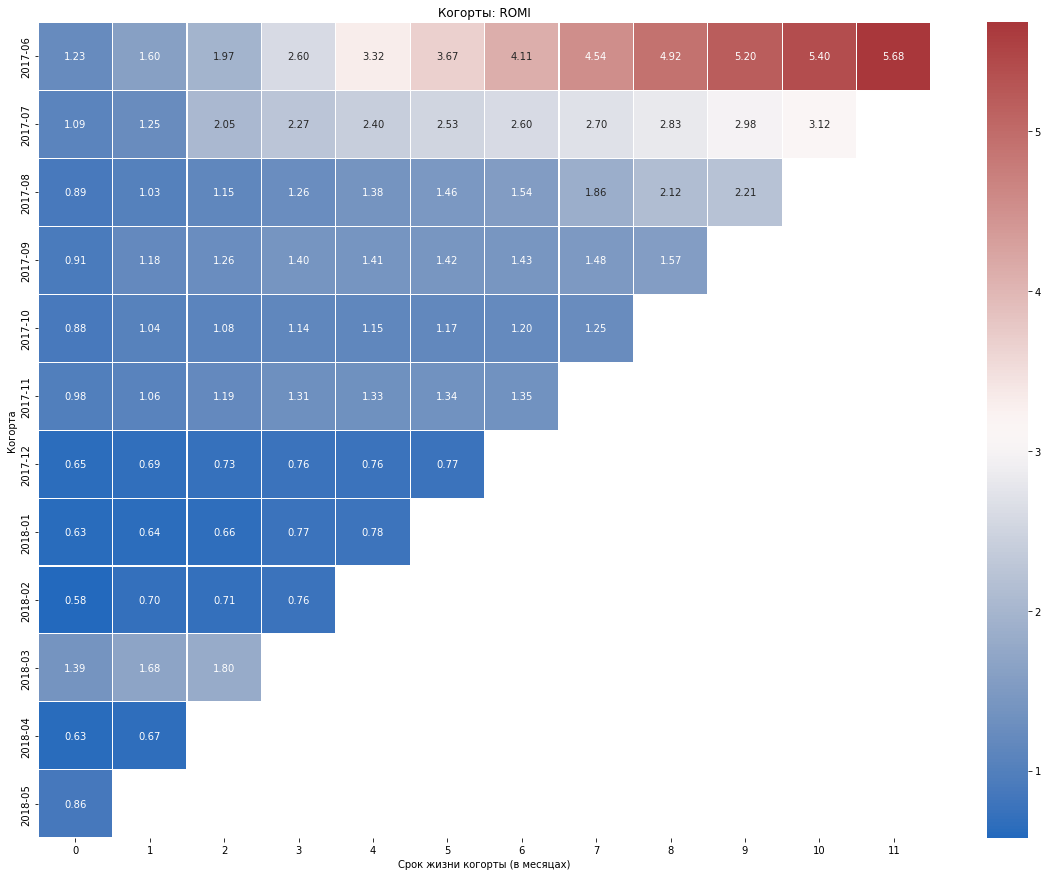

Среднее значение ROMI для когорт "возрастом" 6 месяцев равно: 1.26
-------------------------------------------------------------
ROMI для источника трафика 2:


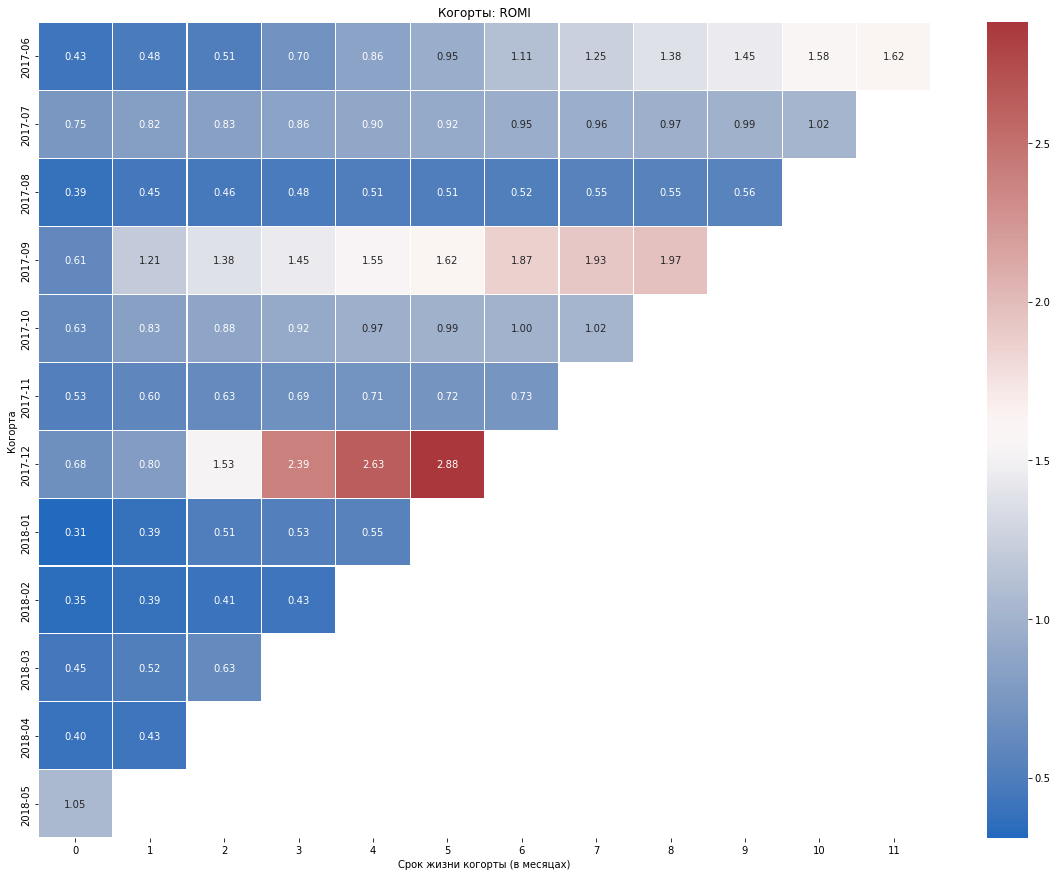

Среднее значение ROMI для когорт "возрастом" 6 месяцев равно: 0.78
-------------------------------------------------------------
ROMI для источника трафика 3:


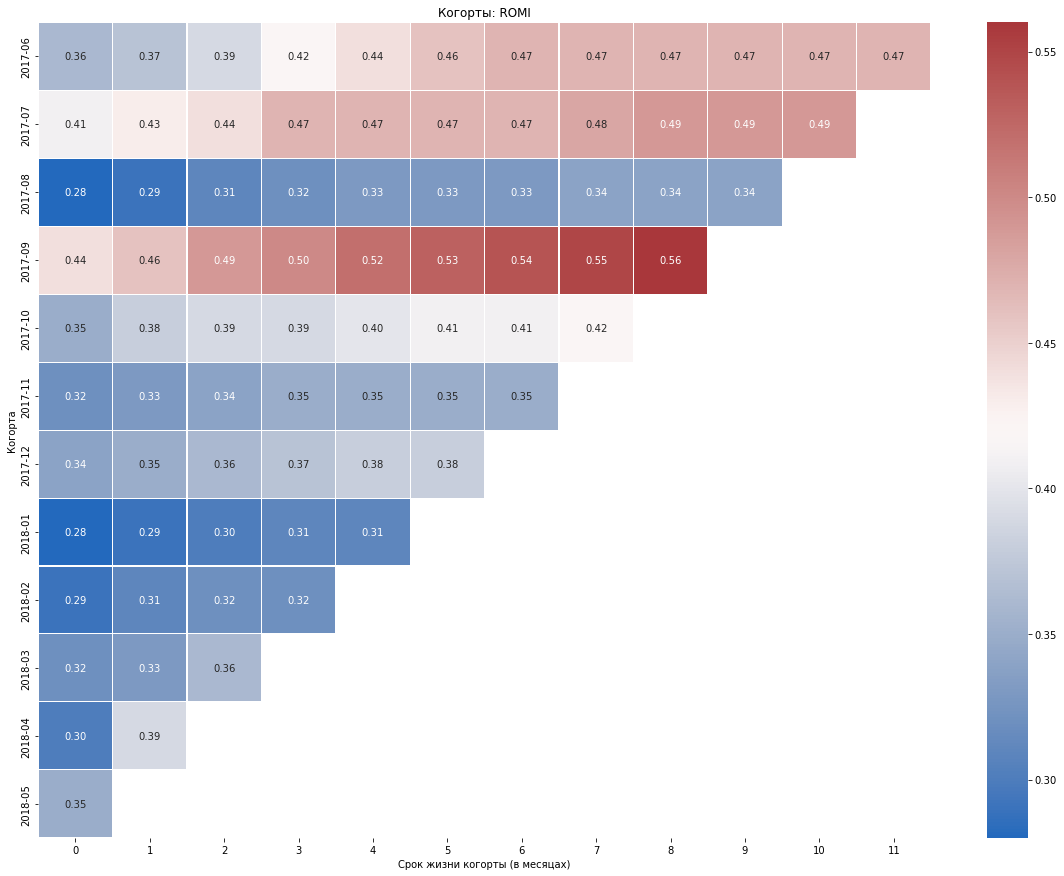

Среднее значение ROMI для когорт "возрастом" 6 месяцев равно: 0.37
-------------------------------------------------------------
ROMI для источника трафика 4:


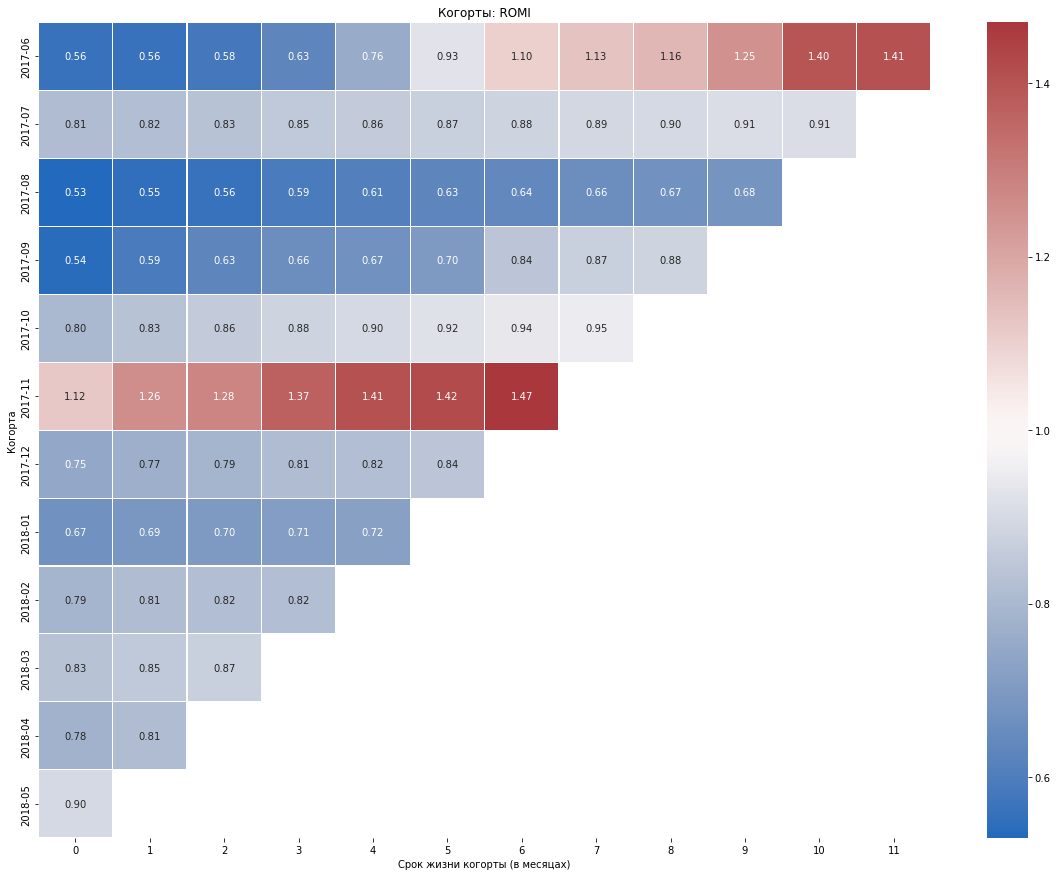

Среднее значение ROMI для когорт "возрастом" 6 месяцев равно: 0.79
-------------------------------------------------------------
ROMI для источника трафика 5:


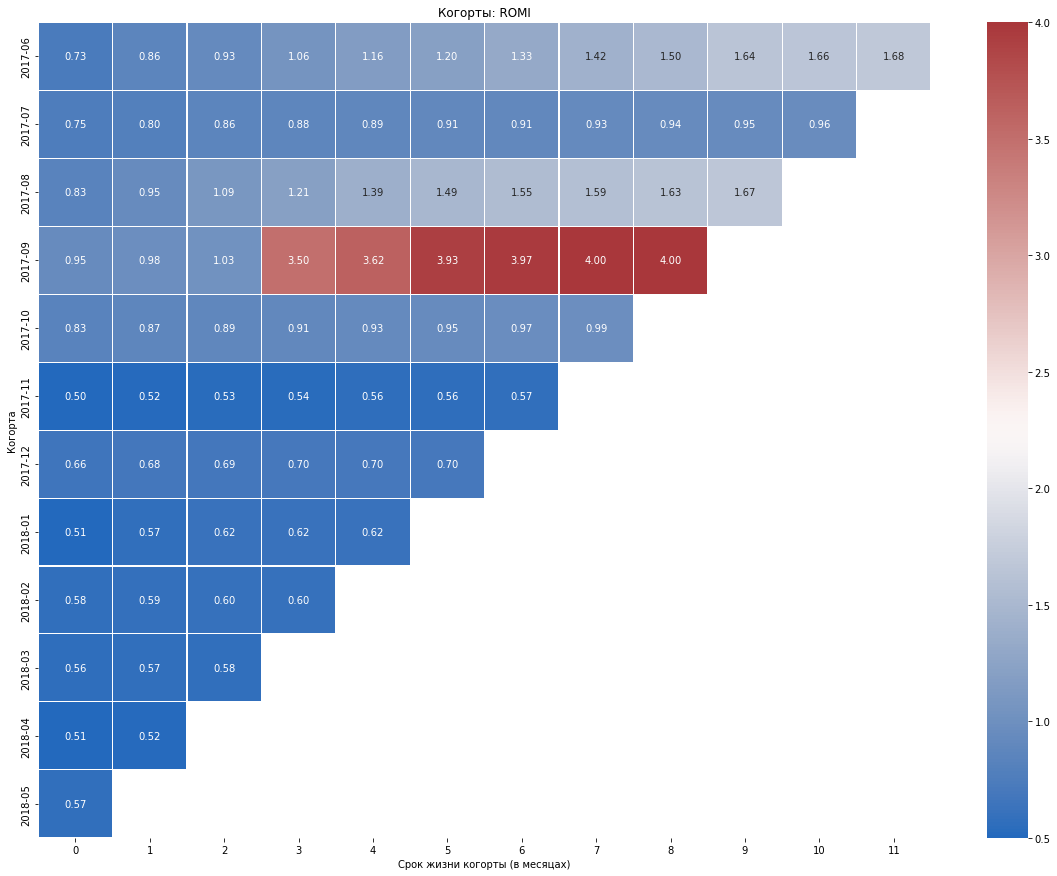

Среднее значение ROMI для когорт "возрастом" 6 месяцев равно: 0.78
-------------------------------------------------------------
ROMI для источника трафика 9:


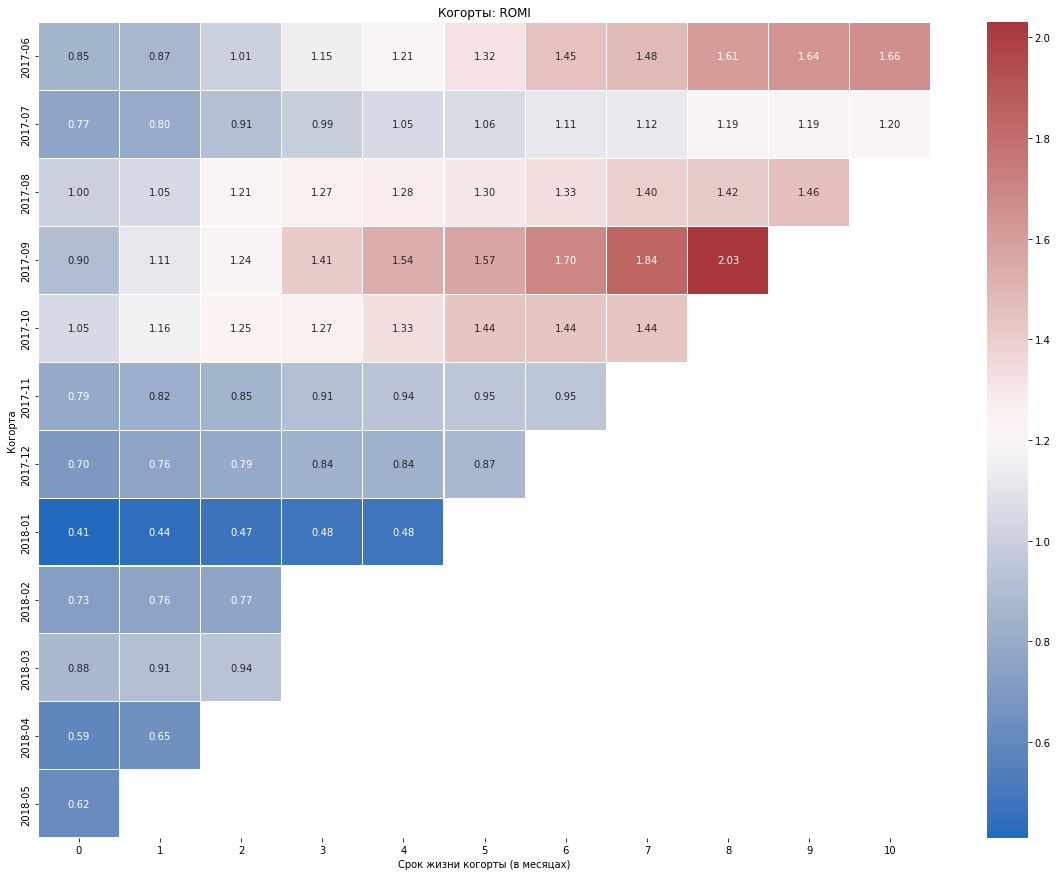

Среднее значение ROMI для когорт "возрастом" 6 месяцев равно: 0.94
-------------------------------------------------------------
ROMI для источника трафика 10:


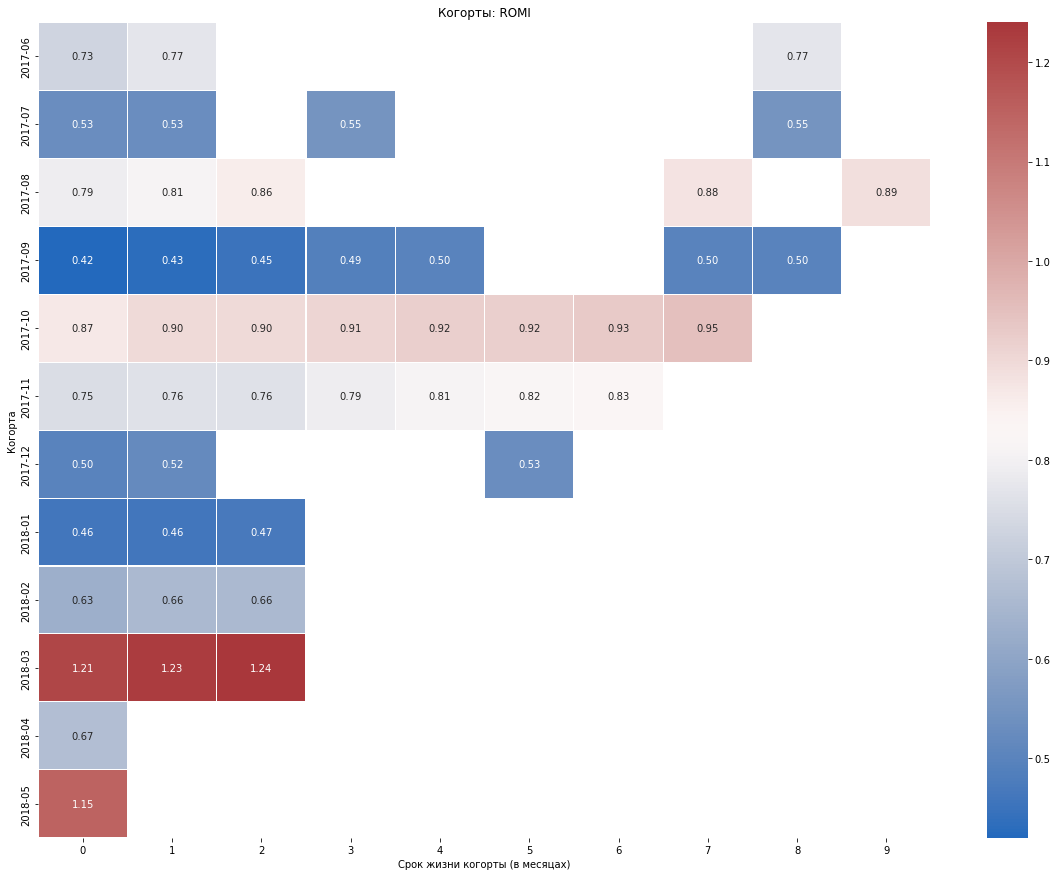

Среднее значение ROMI для когорт "возрастом" 6 месяцев равно: 0.76
-------------------------------------------------------------


In [113]:
# организация цикла по источникам трафика
source_id_list = [1, 2, 3, 4, 5, 9, 10] # список источникрв трафика

for i in source_id_list:
    
    print(f'ROMI для источника трафика {i}:')
    
    # условие по источнику трафика для buyers_query
    buyers_query = buyers_source[buyers_source['source_id'] == i]
    buyers_query.shape
    
        
    # расчет количества покупателей в каждой когорте, сформированной по месяцу первой покупки и источнику
    cohort_sizes = (buyers_query.groupby('first_order_month') \
                .agg({'uid': 'nunique'}) \
                .reset_index()
               )
    cohort_sizes.columns = ['first_order_month', 'n_buyers_query']
    
    
    # таблица с месяцем первой покупки, месяцами последующих покупок и выручке по источнику
    cohorts_ltv = pd.merge(df_orders, buyers_query, how='inner', on='uid') \
                .groupby(['first_order_month', 'order_month']) \
                .agg({'revenue': 'sum'}) \
                .reset_index()
    
    # добавление количества покупателей в первый раз совершивших покупку в каждый месяц по источнику
    report = pd.merge(cohort_sizes, cohorts_ltv, on='first_order_month')
        
    # расчет валовой прибыли компании и возраста когорты
    margin_rate = 1
    report['gp'] = report['revenue'] * margin_rate

    report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
    report['age'] = report['age'].round().astype('int')
      
    
    # расчет выручки на одного покупателя
    report['revenue_per_buyer'] = report['gp'] / report['n_buyers_query']
       
    
    # условие по источнику трафика для cac_source
    cac_buyers_source_query = cac_buyers_source[cac_buyers_source['source_id'] == i]
    
    # объединение report и cac_source_query
    output = pd.merge(report, cac_buyers_source_query, left_on = 'first_order_month', right_on = 'month')
    
    # вычисление ROMI
    output['romi'] = (output['revenue_per_buyer'] / output['cac_source']).round(2)
       
    # вычисление накопительного ROMI
    output_pivot = output.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean').cumsum(axis=1).round(2)
    
   
    # построим heatmap для источников трафика
    plt.figure(figsize=(20, 15))

    yaxis_name = output['first_order_month'].unique().astype('datetime64[M]')

    g = sns.heatmap(output_pivot,
                annot=True, 
                linewidths=.1, fmt='.2f', 
                cmap='vlag',
                yticklabels=yaxis_name
               )
    g.set_title('Когорты: ROMI')
    g.set_ylabel('Когорта')
    g.set_xlabel('Срок жизни когорты (в месяцах)')

    plt.show()
    
    print('Среднее значение ROMI для когорт "возрастом" 6 месяцев равно:', round(output_pivot[2].mean(), 2))
    print('-------------------------------------------------------------')

Из полученных результатов видно, что за весь срок реализации проекта расходы на маркетинг не окупились по двум источникам: 3 и 10. Наилучшие показатели по окупаемости вложений на маркетинг показывает источник 1, который окупился уже в первое полугодие.

#### Промежуточные выводы

- Общая сумма расходов на маркетинг составляет 329131.62 усл.ед. Максимальные расходы на маркетинг отводятся источнику трафика 3, минимальные - источнику 9.
- Расходы на маркетинг начинают увеличиваться с августа 2017 г., достигают своего максимума (38315 усл.ед.) в декабре 2017 г, и постепенно снижаются к маю 2018 г. В этот период увеличение расходов характерно для всех источников, но по источнику трафика 3 темпы расходов гораздо выше, чем по всем остальным.
- Стоимость привлечения клиента (покупателя) для всего проекта равна 9.01 усл.ед.
- Динамика изменения среднего CAC на покупателя за период июнь, 2017 г. - май, 2018 г. демонстрирует нисходящий тренд, что является хорошим показателем.
- Несмотря на максимально большие расходы на маркетинг по источнику 3, стоимость привлечения клиента САС по нему максимальна.
- Метрика ROMI показывает, что за весь срок реализации проекта расходы на маркетинг не окупились по двум источникам: 3 и 10. Наилучшие показатели по окупаемости вложений на маркетинг показывает источник 1, который окупился уже в первое полугодие.

## Выводы и рекомендации

- Среднее число уникальных пользователей за период с июня 2017 г. по конец мая 2018 г. составляет: 907 чел. в день, 5724 чел. в неделю и 23228 чел. в месяц. Метрика DAU указывает резкий всплеск числа уникальных пользователей сайта 24 ноября 2017, а также его резкое снижение, начиная с 29 марта по 3 апреля 2018 г, что вероятно является отражением каких-либо событий/акций/неисправностей. Метрика WAU показывает, что в рассматриваемый временной интервал рост уникального числа пользователей наблюдается в августе 2017 г. и достигает пиковых значений в конце ноября 2017 г. Далее наблюдается нисходящий тренд посещаемости сервиса.
- Среднее число сессий на сайте составляет 987 в день. В среднем около 8% пользователей в течение дня посещают сайт более одного раза. Остальной процент формируют единичные уникальные визиты пользователей. Медианная продолжительность пользовательской сессии на сайте составляет 5 минут, модальная - 60 сек.
- Средний коэффициент удержания пользователей на второй месяц равен 6.5%.

- Медианное время от первого посещения покупателем сайта до совершения первой покупки равно 16 мин. Наиболее часто встречаемое значение от визита до покупки: 1 минута. Обращает на себя внимание то, что присутствует значительное количество покупок для которых время начала сессии равно времени покупки.
- Наибольшее число покупателей было зафиксировано в декабрьской когорте 2017 г. – 4383 чел. Наибольшая накопительная сумма покупок на одного покупателя за полугодовой период была получена для когорты, совершившей первую покупку в июне 2017 г.: 1.7 покупок. Среднее количество покупок на одного покупателя за 6 месяцев составляет 1.43 покупки.
- Средний чек за весь изучаемый период равен 4.84 усл. ед.
- Среднее значение "пожизненной" ценности клиента LTV для когорт "возрастом" 6 месяцев равно 7.97 усл.ед. При этом итоговая сумма денег, которую один клиент принес в среднем со всех своих покупок за 6 месяцев максимальна для сентябрьской когорты 2017 г. и ее LTV составляет 12.31 усл.ед.

- Общая сумма расходов на маркетинг составляет 329131.62 усл.ед. Максимальные расходы на маркетинг отводятся источнику трафика 3, минимальные - источнику 9. Расходы на маркетинг начинают увеличиваться с августа 2017 г., достигают своего максимума (38315 усл.ед.) в декабре 2017 г, и постепенно снижаются к маю 2018 г. В этот период увеличение расходов характерно для всех источников, но по источнику трафика 3 темпы расходов гораздо выше, чем по всем остальным.
- Стоимость привлечения покупателя для всего проекта равна 9.01 усл.ед. Динамика изменения среднего CAC на покупателя за период июнь, 2017 г. - май, 2018 г. демонстрирует нисходящий тренд, что является хорошим показателем. Стоимость привлечения клиента САС по источнику 3 максимальна.
- Источник траффика 4 обеспечил максимальное привлечение уникальных пользователей (72346 чел.) за весь период.
- За весь срок реализации проекта расходы на маркетинг не окупились по двум источникам: 3 и 10. Наилучшие показатели по окупаемости вложений на маркетинг показывает источник 1, который окупился уже в первое полугодие.

Общие рекомендации отделу маркетинга:
- пересмотреть расходы на рекламу по источнику 3 в сторону их снижения.
- обратить внимание на источники 4 и 5, как обеспечивающие значительное привлечение пользователей и высокий ROMI.
- рассмотреть возможность увеличения расходов на маркетинг по источникам траффика 1 и 9, как обеспечивающих высокое ROMI, но небольшое число пользователей при нынешних расходах.